In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import scipy.stats as st
import os
import glob

from DR_analysis_utils import Session, makePSTH, make_neuron_time_trials_tensor 
from DR_analysis_utils import compute_smoothed_response_rate, compute_block_modulation

%matplotlib notebook

In [4]:
main_paths = [
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220815\processed",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220816\processed",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_626791_20220817\processed",
    
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230123\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230124\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230125\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_636766_20230126\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_644864_20230130\processed",
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_644864_20230131\processed", 
    r"\\allen\programs\mindscope\workgroups\dynamicrouting\PilotEphys\Task 2 pilot\DRpilot_644864_20230201\processed", 
    r"\\allen\programs\mindscope\workgroups\np-exp\PilotEphys\Task 2 pilot\DRpilot_644864_20230202\processed",
#     r"\\allen\programs\mindscope\workgroups\np-exp\PilotEphys\Task 2 pilot\DRpilot_644866_20230207\processed", 
    r"Y:\DRpilot_644866_20230208\processed",
    r"Y:\DRpilot_644866_20230209\processed",
    r"Y:\DRpilot_644866_20230210\processed",
    r"Y:\DRpilot_644867_20230220\processed",
    r"Y:\DRpilot_644867_20230221\processed",
    r"Y:\DRpilot_644867_20230222\processed",
    r"Y:\DRpilot_644867_20230223\processed",
    r"Y:\DRpilot_649943_20230213\processed", 
    r"Y:\DRpilot_649943_20230214\processed",
    r"Y:\DRpilot_649943_20230215\processed",
    r"Y:\DRpilot_649943_20230216\processed",   
]


In [6]:
# load sessions + facemap info
sessions={}
keep_n_SVDs=500

for mi,mm in enumerate(main_paths):
    sessions[mi]=Session(path=mm)
    sessions[mi].assign_unit_areas()
    sessions[mi]=compute_smoothed_response_rate(sessions[mi])
    
    multi_ROI_path=r"D:\DR Pilot Data\multi_ROI_ear_nose_processed"
    _dir,vidfilename=os.path.split(glob.glob(os.path.join(mm,"Behavior_*.mp4"))[0])
    behav_path=os.path.join(multi_ROI_path,vidfilename[:-4]+'_proc.npy')

    cam_frames_path = os.path.join(mm,"camera_frames.pkl")
    
    behav_info=np.load(behav_path,allow_pickle=True)
    with open(cam_frames_path, 'rb') as filepath:
        cam_frames=pickle.load(filepath)
        
    sessions[mi].cam_frames=cam_frames
    sessions[mi].facemap_info={}
    sessions[mi].facemap_info['avgframe_reshape']=behav_info.item()['avgframe_reshape']
    sessions[mi].facemap_info['avgmotion_reshape']=behav_info.item()['avgmotion_reshape']
    
    for rr in range(0,len(behav_info.item()['motSVD'])):
    
        sessions[mi].facemap_info['motion_roi'+str(rr)]=behav_info.item()['motion'][rr]
        sessions[mi].facemap_info['motMask_reshape_roi'+str(rr)]=behav_info.item()['motMask_reshape'][rr][:,:,:]
    #     sessions[mi].facemap_info['movMask_reshape']=behav_info.item()['movMask_reshape']
        sessions[mi].facemap_info['motSVD_roi'+str(rr)]=behav_info.item()['motSVD'][rr][:,:]
    #     sessions[mi].facemap_info[]=behav_info.item()

    

probeA areas found
probeB areas found
probeC areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas not found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas not found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas not found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas not found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

probeA areas found
probeB areas found
probeC areas found
probeD areas found
probeE areas found
probeF areas found


C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\Users\ethan.mcbride\Code\dynamic_routing_ephys\analysis\DR_analysis_utils.py:1098: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stimTrials.loc[:,ss+'_smooth']=sg.convolve(stimTrials.loc[:,'trial_response'].values,gwindow,mode='same')/np.sum(gwindow)
C:\U

In [23]:
# get trial-wise SVD features

sel_session = 16
trials = sessions[sel_session].trials

# 2 sec before + after stimulus onset
time_before=2
time_after=2
fps=60
t_points=np.arange(-time_before,time_after,1/fps)

behav_SVD_by_trial = {}
behav_motion_by_trial = {}
mean_trial_behav_SVD = {}

vis_block_behav_SVD = {}
aud_block_behav_SVD = {}
vis_block_behav_SVD_sem = {}
aud_block_behav_SVD_sem = {}

vis_block_behav_motion = {}
aud_block_behav_motion = {}
vis_block_behav_motion_sem = {}
aud_block_behav_motion_sem = {}

for rr in range(0,len(behav_info.item()['motSVD'])):

    behav_SVD_by_trial[rr] = np.zeros(((time_before+time_after)*fps,500,len(sessions[sel_session].trials)))
    behav_motion_by_trial[rr] = np.zeros(((time_before+time_after)*fps,len(sessions[sel_session].trials)))

    for tt,stimStartTime in enumerate(trials['stimStartTime']):
        stim_start_frame=np.where(sessions[sel_session].cam_frames['behavior']>=stimStartTime)[0][0]
        trial_start_frame=stim_start_frame-time_before*fps
        trial_end_frame=stim_start_frame+time_before*fps

        behav_SVD_by_trial[rr][:,:,tt]= sessions[sel_session].facemap_info['motSVD_roi'+str(rr)][trial_start_frame:trial_end_frame,:]    
        behav_motion_by_trial[rr][:,tt] = sessions[sel_session].facemap_info['motion_roi'+str(rr)][trial_start_frame:trial_end_frame]
    
    mean_trial_behav_SVD[rr] = np.nanmean(behav_SVD_by_trial[rr],axis=2)
    


    #average within vis vs. aud blocks
    #SVD
    vis_block_behav_SVD[rr]=np.nanmean(behav_SVD_by_trial[rr][:,:,trials['trialstimRewarded']=='vis1'],axis=2)
    aud_block_behav_SVD[rr]=np.nanmean(behav_SVD_by_trial[rr][:,:,trials['trialstimRewarded']=='sound1'],axis=2)

    vis_block_behav_SVD_sem[rr]=st.sem(behav_SVD_by_trial[rr][:,:,trials['trialstimRewarded']=='vis1'],
                                      nan_policy='omit',axis=2)
    aud_block_behav_SVD_sem[rr]=st.sem(behav_SVD_by_trial[rr][:,:,trials['trialstimRewarded']=='sound1'],
                                      nan_policy='omit',axis=2)

    #absolute motion
    vis_block_behav_motion[rr]=np.nanmean(behav_motion_by_trial[rr][:,trials['trialstimRewarded']=='vis1'],axis=1)
    aud_block_behav_motion[rr]=np.nanmean(behav_motion_by_trial[rr][:,trials['trialstimRewarded']=='sound1'],axis=1)

    vis_block_behav_motion_sem[rr]=st.sem(behav_motion_by_trial[rr][:,trials['trialstimRewarded']=='vis1'],
                                      nan_policy='omit',axis=1)
    aud_block_behav_motion_sem[rr]=st.sem(behav_motion_by_trial[rr][:,trials['trialstimRewarded']=='sound1'],
                                      nan_policy='omit',axis=1)




<IPython.core.display.Javascript object>


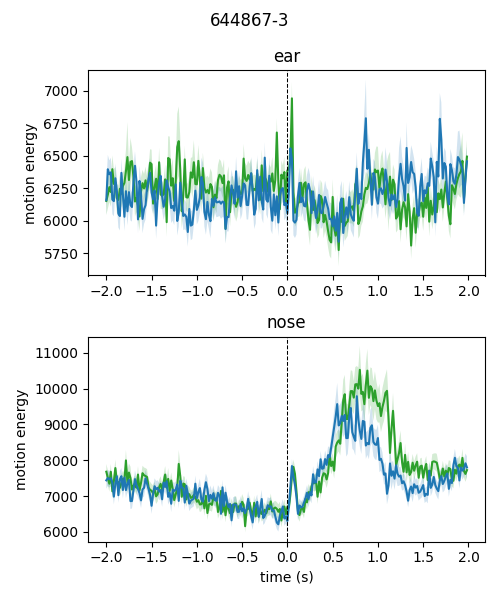

In [27]:
metadata=sessions[sel_session].metadata

fig,ax=plt.subplots(2,1,figsize=(5,6))

roi_names=['face','ear','nose']

for ir,rr in enumerate(range(1,len(behav_info.item()['motSVD']))):

    y=vis_block_behav_motion[rr]
    err=vis_block_behav_motion_sem[rr]
    ax[ir].plot(t_points,y,'tab:green')
    ax[ir].fill_between(t_points, y-err, y+err,
        alpha=0.2, edgecolor=None, facecolor='tab:green')

    y=aud_block_behav_motion[rr]
    err=aud_block_behav_motion_sem[rr]
    ax[ir].plot(t_points,y,'tab:blue')
    ax[ir].fill_between(t_points, y-err, y+err,
        alpha=0.2, edgecolor=None, facecolor='tab:blue')

    ax[ir].axvline(0,color='k',linestyle='--',linewidth=0.75)
    ax[ir].set_ylabel('motion energy')
    ax[ir].set_title(roi_names[rr])
    
ax[-1].set_xlabel('time (s)')


fig.suptitle(metadata['mouseID']+'-'+str(metadata['ephys_session_num']))
fig.tight_layout()

<IPython.core.display.Javascript object>


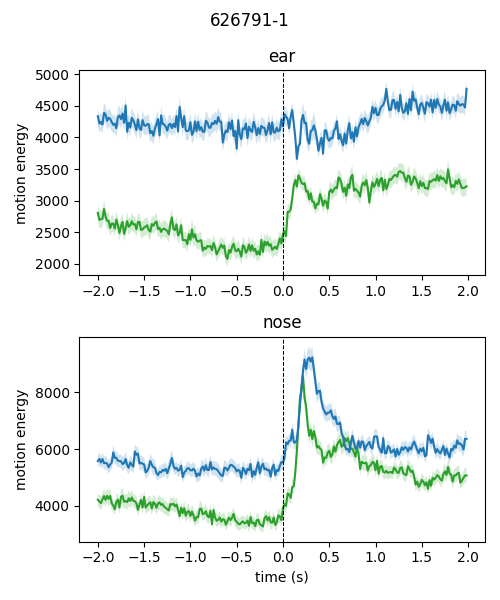

<IPython.core.display.Javascript object>


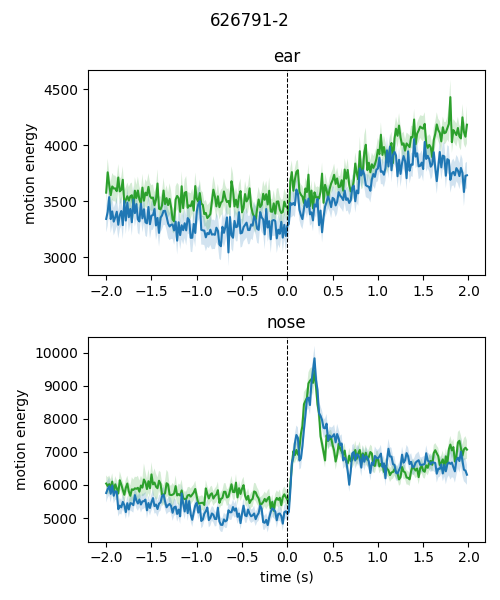

<IPython.core.display.Javascript object>


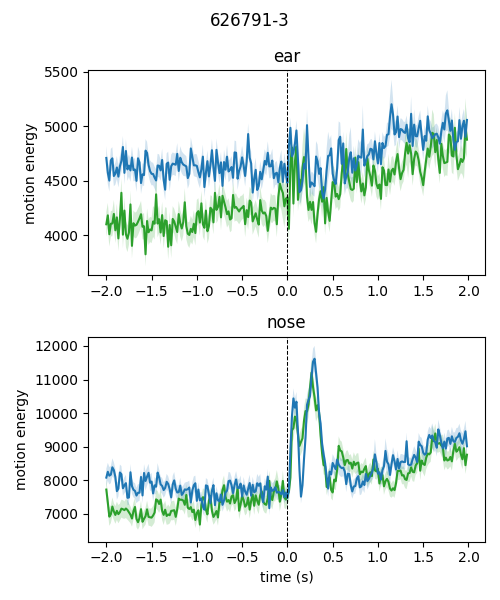

<IPython.core.display.Javascript object>


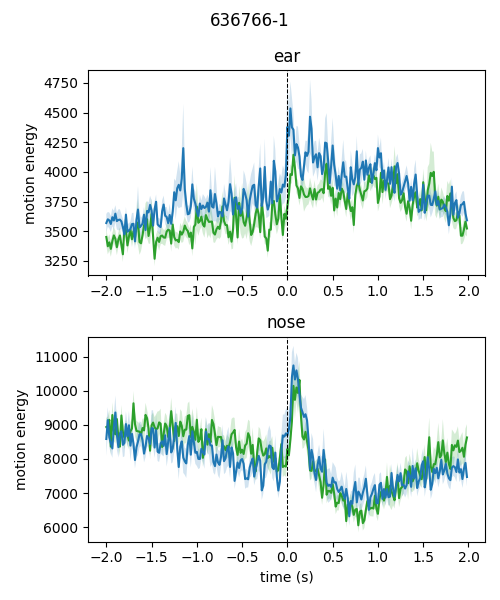

<IPython.core.display.Javascript object>


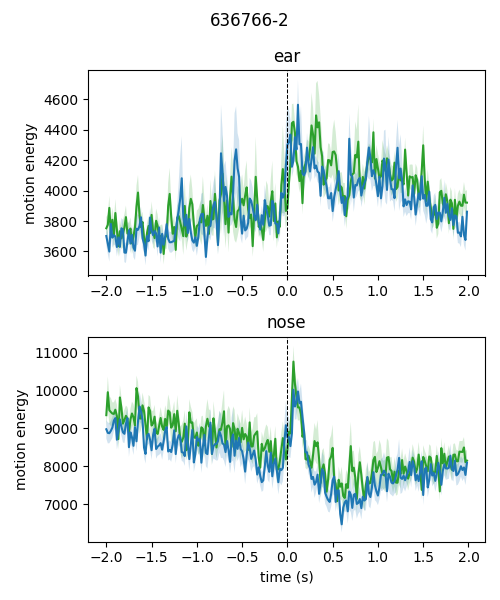

<IPython.core.display.Javascript object>


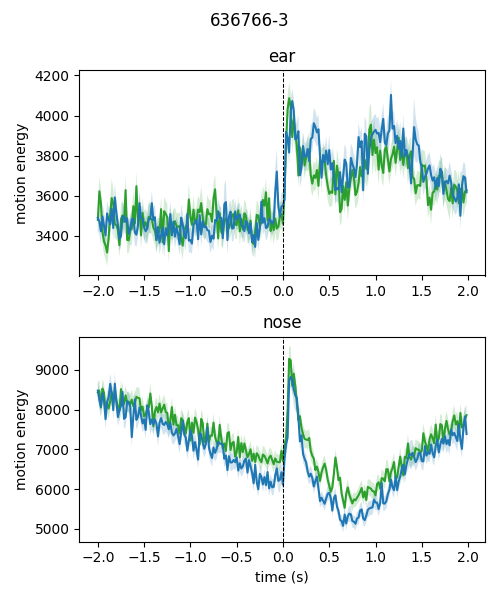

<IPython.core.display.Javascript object>


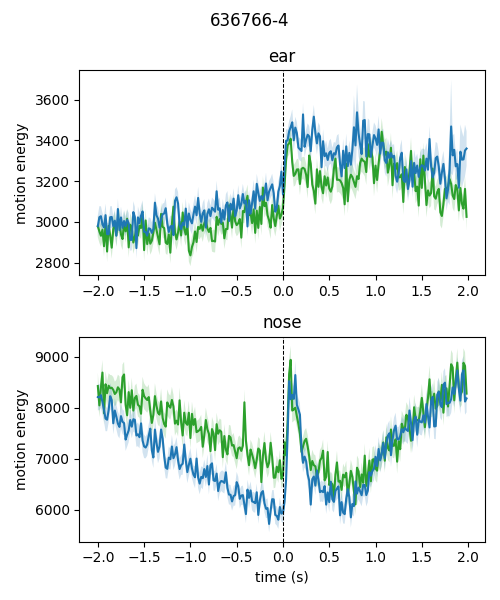

<IPython.core.display.Javascript object>


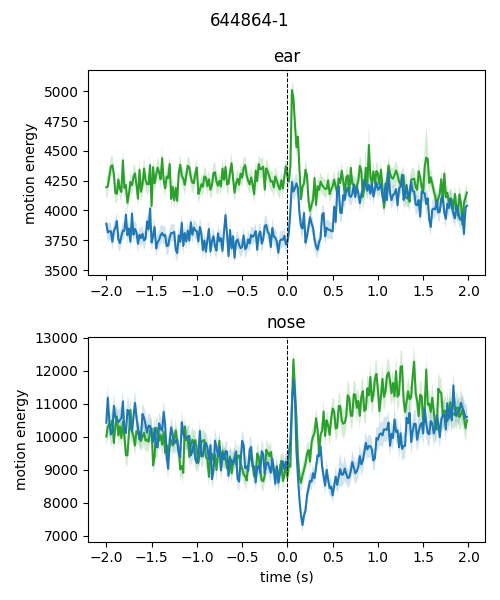

<IPython.core.display.Javascript object>


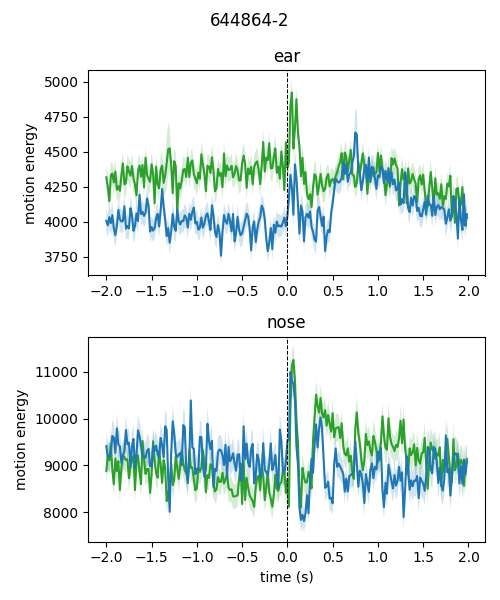

<IPython.core.display.Javascript object>


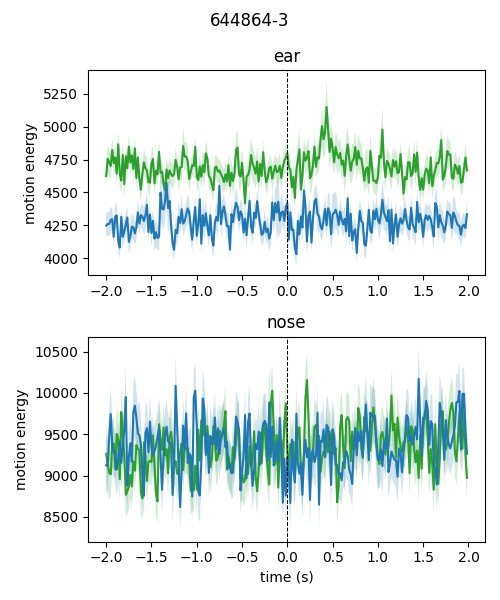

IndexError: index 0 is out of bounds for axis 0 with size 0

In [28]:
# loop through sessions

# get trial-wise SVD features

for sel_session in range(0,len(sessions)):
# sel_session = 16
    trials = sessions[sel_session].trials
    metadata=sessions[sel_session].metadata

    # 2 sec before + after stimulus onset
    time_before=2
    time_after=2
    fps=60
    t_points=np.arange(-time_before,time_after,1/fps)

    behav_SVD_by_trial = {}
    behav_motion_by_trial = {}
    mean_trial_behav_SVD = {}

    vis_block_behav_SVD = {}
    aud_block_behav_SVD = {}
    vis_block_behav_SVD_sem = {}
    aud_block_behav_SVD_sem = {}

    vis_block_behav_motion = {}
    aud_block_behav_motion = {}
    vis_block_behav_motion_sem = {}
    aud_block_behav_motion_sem = {}

    for rr in range(0,len(behav_info.item()['motSVD'])):

        behav_SVD_by_trial[rr] = np.zeros(((time_before+time_after)*fps,500,len(sessions[sel_session].trials)))
        behav_motion_by_trial[rr] = np.zeros(((time_before+time_after)*fps,len(sessions[sel_session].trials)))

        for tt,stimStartTime in enumerate(trials['stimStartTime']):
            stim_start_frame=np.where(sessions[sel_session].cam_frames['behavior']>=stimStartTime)[0][0]
            trial_start_frame=stim_start_frame-time_before*fps
            trial_end_frame=stim_start_frame+time_before*fps

            behav_SVD_by_trial[rr][:,:,tt]= sessions[sel_session].facemap_info['motSVD_roi'+str(rr)][trial_start_frame:trial_end_frame,:]    
            behav_motion_by_trial[rr][:,tt] = sessions[sel_session].facemap_info['motion_roi'+str(rr)][trial_start_frame:trial_end_frame]

        mean_trial_behav_SVD[rr] = np.nanmean(behav_SVD_by_trial[rr],axis=2)



        #average within vis vs. aud blocks
        #SVD
        vis_block_behav_SVD[rr]=np.nanmean(behav_SVD_by_trial[rr][:,:,trials['trialstimRewarded']=='vis1'],axis=2)
        aud_block_behav_SVD[rr]=np.nanmean(behav_SVD_by_trial[rr][:,:,trials['trialstimRewarded']=='sound1'],axis=2)

        vis_block_behav_SVD_sem[rr]=st.sem(behav_SVD_by_trial[rr][:,:,trials['trialstimRewarded']=='vis1'],
                                          nan_policy='omit',axis=2)
        aud_block_behav_SVD_sem[rr]=st.sem(behav_SVD_by_trial[rr][:,:,trials['trialstimRewarded']=='sound1'],
                                          nan_policy='omit',axis=2)

        #absolute motion
        vis_block_behav_motion[rr]=np.nanmean(behav_motion_by_trial[rr][:,trials['trialstimRewarded']=='vis1'],axis=1)
        aud_block_behav_motion[rr]=np.nanmean(behav_motion_by_trial[rr][:,trials['trialstimRewarded']=='sound1'],axis=1)

        vis_block_behav_motion_sem[rr]=st.sem(behav_motion_by_trial[rr][:,trials['trialstimRewarded']=='vis1'],
                                          nan_policy='omit',axis=1)
        aud_block_behav_motion_sem[rr]=st.sem(behav_motion_by_trial[rr][:,trials['trialstimRewarded']=='sound1'],
                                          nan_policy='omit',axis=1)


    #plot
    fig,ax=plt.subplots(2,1,figsize=(5,6),sharey=True,sharex=True)

    roi_names=['face','ear','nose']

    for ir,rr in enumerate(range(1,len(behav_info.item()['motSVD']))):

        y=vis_block_behav_motion[rr]
        err=vis_block_behav_motion_sem[rr]
        ax[ir].plot(t_points,y,'tab:green')
        ax[ir].fill_between(t_points, y-err, y+err,
            alpha=0.2, edgecolor=None, facecolor='tab:green')

        y=aud_block_behav_motion[rr]
        err=aud_block_behav_motion_sem[rr]
        ax[ir].plot(t_points,y,'tab:blue')
        ax[ir].fill_between(t_points, y-err, y+err,
            alpha=0.2, edgecolor=None, facecolor='tab:blue')

        ax[ir].axvline(0,color='k',linestyle='--',linewidth=0.75)
        ax[ir].set_ylabel('motion energy')
        ax[ir].set_title(roi_names[rr])

    ax[-1].set_xlabel('time (s)')

    fig.suptitle(metadata['mouseID']+'-'+str(metadata['ephys_session_num']))
    fig.tight_layout()
    

In [ ]:
## IDEA:

#Plot video snippets before/during CR trials, vs. FA trials

#also plot quiescent period violation licks

#

In [ ]:
# also load decoding analysis results

loadpath=r'C:\Users\ethan.mcbride\OneDrive - Allen Institute\DR decoding results\by_session\use_25_units'

svc_results={}
decoder_results=os.listdir(loadpath)

for ii,ff in enumerate(decoder_results):
    with open(os.path.join(loadpath,ff),'rb') as handle:
        svc_results[ii]=pickle.load(handle)
    print(ff)
    

In [ ]:
session_areas=[]
p='block_ids'
for sel_session in range(0,len(svc_results)):
    session_areas.append(list(svc_results[sel_session][p].keys()))
    
unique_areas=np.unique(np.hstack(session_areas))
unique_areas

In [ ]:
fig,ax=plt.subplots(1,1)
ax.plot(np.mean(np.vstack(svc_results_face[0]['block_ids'][0][0][0]['coefs']),axis=0),'k.')

In [ ]:
# make into more plottable format

####change this to deal with multiple #s of trials and average over re-runs of the SVC

plot_results={}
plot_shuffle_results={}
predict_perf={}
predict_perf_shuffle={}
predict_perf_tridx={}
dec_func={}
dec_func_shuffle={}

timepoints=svc_results[0]['time_bins'][1:]

label_list=['vis1','vis2','sound1','sound2','True','False']
# label_list=['vis1','sound1','True','False']

# predict=['stim_ids','block_ids','trial_response']
predict=['block_ids']

# areas=['VISp','AUD','LG','MG','MOs','MRN','CP','MOp']
areas=unique_areas

for sel_session in range(0,len(svc_results)):
    plot_results[sel_session]={}
    plot_shuffle_results[sel_session]={}
    for aa in areas:
        plot_results[sel_session][aa]={}
        plot_shuffle_results[sel_session][aa]={}
        for p in predict:
            plot_results[sel_session][aa][p]={}
            plot_shuffle_results[sel_session][aa][p]={}
            for ll in label_list:
                plot_results[sel_session][aa][p][ll]=np.zeros((len(timepoints),svc_results[sel_session]['n_repeats']))
                plot_results[sel_session][aa][p][ll][:]=np.nan
                
                plot_shuffle_results[sel_session][aa][p][ll]=np.zeros((len(timepoints),svc_results[sel_session]['n_repeats']))
                plot_shuffle_results[sel_session][aa][p][ll][:]=np.nan

decoder_acc_session_mean = {}
decoder_acc_session_shuffle_mean = {}
for aa in areas:
    decoder_acc_session_mean[aa]={}
    decoder_acc_session_shuffle_mean[aa]={}
    for p in predict:
        decoder_acc_session_mean[aa][p]={}
        decoder_acc_session_shuffle_mean[aa][p]={}
        for ll in label_list:
            
            decoder_acc_session_mean[aa][p][ll]=np.zeros((len(timepoints),
                                                           len(svc_results)))
            decoder_acc_session_mean[aa][p][ll][:]=np.nan
            
            decoder_acc_session_shuffle_mean[aa][p][ll]=np.zeros((len(timepoints),
                                                           len(svc_results)))
            decoder_acc_session_shuffle_mean[aa][p][ll][:]=np.nan
        
                
for sel_session in range(0,len(svc_results)):
    for p in predict:
        for aa in areas: 
            if aa in svc_results[sel_session][p].keys():
                for tt,tp in enumerate(timepoints):
                    for nn in range(0,svc_results[sel_session]['n_repeats']):
                        for ll in label_list:
                            if len(svc_results[sel_session][p][aa])>0:
                                if len(svc_results[sel_session][p][aa][tt])>0:
                                    if ll in svc_results[sel_session][p][aa][tt][nn]['cr'].keys():
                                        temp_perf=np.nanmean(svc_results[sel_session][p]
                                                          [aa][tt][nn]['cr'][ll]
                                                          [['precision','recall']].values)
                                        plot_results[sel_session][aa][p][ll][tt,nn]=temp_perf
                                        
                                        temp_shuff_perf=np.nanmean(svc_results[sel_session][p]
                                                          [aa][tt][nn]['shuffle']['cr'][ll]
                                                          [['precision','recall']].values)
                                        plot_shuffle_results[sel_session][aa][p][ll][tt,nn]=temp_shuff_perf

                    for ll in label_list:
                        if len(svc_results[sel_session][p][aa])>0:                    
                            decoder_acc_mean = np.nanmean(plot_results[sel_session][aa][p][ll][tt])
                            decoder_acc_session_mean[aa][p][ll][tt,sel_session] = decoder_acc_mean
    
                            decoder_acc_shuffle_mean = np.nanmean(plot_shuffle_results[sel_session][aa][p][ll][tt])
                            decoder_acc_session_shuffle_mean[aa][p][ll][tt,sel_session] = decoder_acc_shuffle_mean
    
    
for sel_session in range(0,len(svc_results)):
    predict_perf[sel_session]={}
    predict_perf_shuffle[sel_session]={}
    predict_perf_tridx[sel_session]={}
    dec_func[sel_session]={}
    dec_func_shuffle[sel_session]={}
    for aa in areas:
        if aa in svc_results[sel_session][p].keys():
            predict_perf[sel_session][aa]={}
            predict_perf_shuffle[sel_session][aa]={}
            predict_perf_tridx[sel_session][aa]={}
            dec_func[sel_session][aa]={}
            dec_func_shuffle[sel_session][aa]={}
            for p in predict:
                predict_perf[sel_session][aa][p]=np.zeros(
                    (len(svc_results[sel_session][p][aa][0][0]['pred_label']),svc_results[sel_session]['n_repeats']))
                predict_perf_shuffle[sel_session][aa][p]=np.zeros(
                    (len(svc_results[sel_session][p][aa][0][0]['pred_label']),svc_results[sel_session]['n_repeats']))
                predict_perf_tridx[sel_session][aa][p]=np.zeros(
                    (len(svc_results[sel_session][p][aa][0][0]['pred_label']),svc_results[sel_session]['n_repeats']))
                
                if 'decision_function' in svc_results[sel_session][p][aa][0][0].keys():
                    dec_func[sel_session][aa][p]=svc_results[sel_session][p][aa][0][0]['decision_function']
                    dec_func_shuffle[sel_session][aa][p]=svc_results[sel_session][p][aa][0][0]['shuffle']['decision_function']
                    

    sessions[sel_session].decoder={}
    sessions[sel_session].decoder['dec_func']=dec_func[sel_session]
    sessions[sel_session].decoder['dec_func_shuffle']=dec_func_shuffle[sel_session]

In [ ]:
dec_func[sel_session]

In [ ]:
#load decoding facemap results

loadpath=r'C:\Users\ethan.mcbride\OneDrive - Allen Institute\DR decoding results\use_video\use_50_SVD_features'

svc_results_face={}
decoder_results_face=os.listdir(loadpath)

for ii,ff in enumerate(decoder_results_face):
    with open(os.path.join(loadpath,ff),'rb') as handle:
        svc_results_face[ii]=pickle.load(handle)
    print(ff)

In [ ]:
# # make into more plottable format

# ####change this to deal with multiple #s of trials and average over re-runs of the SVC

# plot_results_face={}
# plot_shuffle_results_face={}

# timepoints=svc_results_face[0]['time_bins']
# n_repeats=svc_results_face[0]['n_repeats']

# label_list=['vis1','vis2','sound1','sound2','True','False']
# # label_list=['vis1','sound1','True','False']

# # predict=['stim_ids','block_ids','trial_response']
# predict=['block_ids']

# # areas=['VISp','AUD','LG','MG','MOs','MRN','CP','MOp']
# # areas=all_areas
# areas=[0]

# for sel_session in range(0,len(svc_results_face)):
#     plot_results_face[sel_session]={}
#     plot_shuffle_results_face[sel_session]={}
#     for aa in areas:
#         plot_results_face[sel_session][aa]={}
#         plot_shuffle_results_face[sel_session][aa]={}
#         for p in predict:
#             plot_results_face[sel_session][aa][p]={}
#             plot_shuffle_results_face[sel_session][aa][p]={}
#             for ll in label_list:
#                 plot_results_face[sel_session][aa][p][ll]=np.zeros((len(timepoints),n_repeats))
#                 plot_results_face[sel_session][aa][p][ll][:]=np.nan
                
#                 plot_shuffle_results_face[sel_session][aa][p][ll]=np.zeros((len(timepoints),n_repeats))
#                 plot_shuffle_results_face[sel_session][aa][p][ll][:]=np.nan

    
# # diff table for each timepoint?
# # row = session
# # columns = ['modality','A_vis','A_aud','B_vis','B_aud','C_vis','C_aud','F_vis','F_aud',]

# decoder_acc_session_mean_face = {}
# decoder_acc_session_shuffle_mean_face = {}
# for aa in areas:
#     decoder_acc_session_mean_face[aa]={}
#     decoder_acc_session_shuffle_mean_face[aa]={}
#     for p in predict:
#         decoder_acc_session_mean_face[aa][p]={}
#         decoder_acc_session_shuffle_mean_face[aa][p]={}
#         for ll in label_list:
            
#             decoder_acc_session_mean_face[aa][p][ll]=np.zeros((len(timepoints),
#                                                            len(main_paths)))
#             decoder_acc_session_mean_face[aa][p][ll][:]=np.nan
            
#             decoder_acc_session_shuffle_mean_face[aa][p][ll]=np.zeros((len(timepoints),
#                                                            len(main_paths)))
#             decoder_acc_session_shuffle_mean_face[aa][p][ll][:]=np.nan
        

# for sel_session in range(0,len(svc_results_face)):
#     for p in predict:
#         for aa in areas: 
#             if aa in svc_results_face[sel_session][p].keys():
#                 for tt,tp in enumerate(timepoints):
#                     for nn in range(0,n_repeats):
#                         for ll in label_list:
#                             if len(svc_results_face[sel_session][p][aa])>0:
#                                 if len(svc_results_face[sel_session][p][aa][tt])>0:
#                                     if ll in svc_results_face[sel_session][p][aa][tt][nn]['cr'].keys():
#                                         temp_perf=np.nanmean(svc_results_face[sel_session][p]
#                                                           [aa][tt][nn]['cr'][ll]
#                                                           [['precision','recall']].values)
#                                         plot_results_face[sel_session][aa][p][ll][tt,nn]=temp_perf
                                        
#                                         temp_shuff_perf=np.nanmean(svc_results_face[sel_session][p]
#                                                           [aa][tt][nn]['shuffle']['cr'][ll]
#                                                           [['precision','recall']].values)
#                                         plot_shuffle_results_face[sel_session][aa][p][ll][tt,nn]=temp_shuff_perf

#                     for ll in label_list:
#                         if len(svc_results_face[sel_session][p][aa])>0:                    
#                             decoder_acc_mean_face = np.nanmean(plot_results_face[sel_session][aa][p][ll][tt])
#                             decoder_acc_session_mean_face[aa][p][ll][tt,sel_session] = decoder_acc_mean_face
    
#                             decoder_acc_shuffle_mean_face = np.nanmean(plot_shuffle_results_face[sel_session][aa][p][ll][tt])
#                             decoder_acc_session_shuffle_mean_face[aa][p][ll][tt,sel_session] = decoder_acc_shuffle_mean_face
            
# for sel_session in range(0,len(svc_results_face)):
#     predict_perf[sel_session]={}
#     predict_perf_shuffle[sel_session]={}
#     predict_perf_tridx[sel_session]={}
#     dec_func[sel_session]={}
#     dec_func_shuffle[sel_session]={}
#     for aa in areas:
#         if aa in svc_results_face[sel_session][predict[0]].keys():
#             predict_perf[sel_session][aa]={}
#             predict_perf_shuffle[sel_session][aa]={}
#             predict_perf_tridx[sel_session][aa]={}
#             dec_func[sel_session][aa]={}
#             dec_func_shuffle[sel_session][aa]={}
#             if len(svc_results_face[sel_session][p][aa][0])>0:
#                 for p in predict:
#                     predict_perf[sel_session][aa][p]=np.zeros(
#                         (len(svc_results_face[sel_session][p][aa][0][0]['pred_label']),svc_results_face[sel_session]['n_repeats']))
#                     predict_perf_shuffle[sel_session][aa][p]=np.zeros(
#                         (len(svc_results_face[sel_session][p][aa][0][0]['pred_label']),svc_results_face[sel_session]['n_repeats']))
#                     predict_perf_tridx[sel_session][aa][p]=np.zeros(
#                         (len(svc_results_face[sel_session][p][aa][0][0]['pred_label']),svc_results_face[sel_session]['n_repeats']))

#                     if 'decision_function' in svc_results_face[sel_session][p][aa][0][0].keys():
#                         dec_func[sel_session][aa][p]=svc_results_face[sel_session][p][aa][0][0]['decision_function']
#                         dec_func_shuffle[sel_session][aa][p]=svc_results_face[sel_session][p][aa][0][0]['shuffle']['decision_function']
                    

#     sessions[sel_session].decoder_face={}
#     sessions[sel_session].decoder_face['dec_func']=dec_func[sel_session]
#     sessions[sel_session].decoder_face['dec_func_shuffle']=dec_func_shuffle[sel_session]

# # plot_results[area][label/stimulus][timepoint_idx][ntrials_idx,nunits_idx,n_repeats]

In [ ]:
svc_results_face[0]['block_ids'][0][0][0].keys()

In [ ]:
svc_results[0]['block_ids']['all'][0][0].keys()

In [ ]:
# svc_results_face[0]['block_ids'][0][0][0]['pred_label']
# aa

In [ ]:
# plot_results[sel_session]
sessions[sel_session].decoder_face['dec_func'][0]['block_ids']


In [ ]:
# svc_results_face[sel_session][p][aa][tt][nn]

In [ ]:
#calculate mean face motion, SVD in 1 sec prior to each trial
# 1 sec before stimulus onset
time_before=1
time_after=0
fps=60

for sel_session in sessions:
    behav_SVD_by_trial = np.zeros(((time_before+time_after)*fps,keep_n_SVDs,len(sessions[sel_session].trials)))
    behav_motion_by_trial = np.zeros(((time_before+time_after)*fps,len(sessions[sel_session].trials)))
    
    behav_SVD_by_trial[:]=np.nan
    behav_motion_by_trial[:]=np.nan
    
    for tt,stimStartTime in enumerate(sessions[sel_session].trials['stimStartTime']):
        if len(np.where(sessions[sel_session].cam_frames['behavior']>=stimStartTime)[0])>0:
            stim_start_frame=np.where(sessions[sel_session].cam_frames['behavior']>=stimStartTime)[0][0]
            trial_start_frame=stim_start_frame-time_before*fps
            trial_end_frame=stim_start_frame+time_after*fps

            behav_SVD_by_trial[:,:,tt] = sessions[sel_session].facemap_info['motSVD'][trial_start_frame:trial_end_frame,:keep_n_SVDs]    
            behav_motion_by_trial[:,tt] = sessions[sel_session].facemap_info['motion'][trial_start_frame:trial_end_frame]
            
    mean_trial_behav_SVD = np.nanmean(behav_SVD_by_trial,axis=0)
    mean_trial_behav_motion = np.nanmean(behav_motion_by_trial,axis=0)


    #add to session trial table
    sessions[sel_session].trials['behav_motion'] = mean_trial_behav_motion
    for xx in range(0,keep_n_SVDs):
        sessions[sel_session].trials['behav_SVD_'+str(xx)] = mean_trial_behav_SVD[xx,:]
    

In [ ]:
np.where(sessions[sel_session].cam_frames['behavior']>=stimStartTime)[0]

In [ ]:
sessions[sel_session].trials.columns

In [ ]:
sessions[sel_session].decoder['dec_func']['all']['block_ids']

In [ ]:
ss=11

fig,ax=plt.subplots(1,1)

ax.plot(sessions[ss].trials.query('trialstimRewarded == "vis1"')['avg_run_speed'],
        sessions[ss].trials.query('trialstimRewarded == "vis1"')['behav_motion'],'g.',alpha=0.5)
ax.plot(sessions[ss].trials.query('trialstimRewarded == "sound1"')['avg_run_speed'],
        sessions[ss].trials.query('trialstimRewarded == "sound1"')['behav_motion'],'b.',alpha=0.5)

r,p=st.pearsonr(sessions[ss].trials['avg_run_speed'],sessions[ss].trials['behav_motion'])
ax.set_xlabel('run speed')
ax.set_ylabel('motion energy')
ax.set_title(sessions[ss].metadata['mouseID']+'_'+str(sessions[ss].metadata['ephys_session_num'])
             +';  r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

In [ ]:
ss=11

vis_tridx=sessions[ss].trials.query('trialstimRewarded == "vis1"').index
aud_tridx=sessions[ss].trials.query('trialstimRewarded == "sound1"').index

fig,ax=plt.subplots(1,1)

ax.plot(sessions[ss].decoder['dec_func']['all']['block_ids'][vis_tridx],
        sessions[ss].trials.query('trialstimRewarded == "vis1"')['avg_run_speed'],'g.',alpha=0.5)
ax.plot(sessions[ss].decoder['dec_func']['all']['block_ids'][aud_tridx],
        sessions[ss].trials.query('trialstimRewarded == "sound1"')['avg_run_speed'],'b.',alpha=0.5)

r,p=st.pearsonr(sessions[ss].decoder['dec_func']['all']['block_ids'],sessions[ss].trials['avg_run_speed'])
ax.set_xlabel('unit decoder confidence')
ax.set_ylabel('avg run speed')
ax.set_title(sessions[ss].metadata['mouseID']+'_'+str(sessions[ss].metadata['ephys_session_num'])
             +';  r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

In [ ]:
ss=11

vis_tridx=sessions[ss].trials.query('trialstimRewarded == "vis1"').index
aud_tridx=sessions[ss].trials.query('trialstimRewarded == "sound1"').index

fig,ax=plt.subplots(1,1)

ax.plot(sessions[ss].decoder['dec_func']['all']['block_ids'][vis_tridx],
        sessions[ss].trials.query('trialstimRewarded == "vis1"')['behav_motion'],'g.',alpha=0.5)
ax.plot(sessions[ss].decoder['dec_func']['all']['block_ids'][aud_tridx],
        sessions[ss].trials.query('trialstimRewarded == "sound1"')['behav_motion'],'b.',alpha=0.5)

r,p=st.pearsonr(sessions[ss].decoder['dec_func']['all']['block_ids'],sessions[ss].trials['behav_motion'])
ax.set_xlabel('unit decoder confidence')
ax.set_ylabel('motion energy')
ax.set_title(sessions[ss].metadata['mouseID']+'_'+str(sessions[ss].metadata['ephys_session_num'])
             +';  r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

In [ ]:
ss=19

vis_tridx=sessions[ss].trials.query('trialstimRewarded == "vis1"').index
aud_tridx=sessions[ss].trials.query('trialstimRewarded == "sound1"').index

fig,ax=plt.subplots(1,1)

ax.plot(sessions[ss].decoder['dec_func']['all']['block_ids'][vis_tridx],
        sessions[ss].decoder_face['dec_func'][0]['block_ids'][vis_tridx],'g.',alpha=0.5)
ax.plot(sessions[ss].decoder['dec_func']['all']['block_ids'][aud_tridx],
        sessions[ss].decoder_face['dec_func'][0]['block_ids'][aud_tridx],'b.',alpha=0.5)

r,p=st.pearsonr(sessions[ss].decoder['dec_func']['all']['block_ids'],
                sessions[ss].decoder_face['dec_func'][0]['block_ids'])
ax.set_xlabel('unit decoder confidence')
ax.set_ylabel('face decoder confidence')
ax.set_title(sessions[ss].metadata['mouseID']+'_'+str(sessions[ss].metadata['ephys_session_num'])
             +';  r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))
# ax.set_ylim([-3,6])

In [ ]:
ss=11

vis_tridx=sessions[ss].trials.query('trialstimRewarded == "vis1"').index
aud_tridx=sessions[ss].trials.query('trialstimRewarded == "sound1"').index

fig,ax=plt.subplots(1,1)

ax.plot(sessions[ss].decoder_face['dec_func'][0]['block_ids'][vis_tridx],
        sessions[ss].trials.query('trialstimRewarded == "vis1"')['behav_motion'],'g.',alpha=0.5)
ax.plot(sessions[ss].decoder_face['dec_func'][0]['block_ids'][aud_tridx],
        sessions[ss].trials.query('trialstimRewarded == "sound1"')['behav_motion'],'b.',alpha=0.5)

r,p=st.pearsonr(sessions[ss].decoder_face['dec_func'][0]['block_ids'],sessions[ss].trials['behav_motion'])
ax.set_xlabel('face decoder confidence')
ax.set_ylabel('motion energy')
ax.set_title(sessions[ss].metadata['mouseID']+'_'+str(sessions[ss].metadata['ephys_session_num'])
             +';  r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

In [ ]:
ss=11

vis_tridx=sessions[ss].trials.query('trialstimRewarded == "vis1"').index
aud_tridx=sessions[ss].trials.query('trialstimRewarded == "sound1"').index

fig,ax=plt.subplots(1,1)

ax.plot(sessions[ss].decoder_face['dec_func'][0]['block_ids'][vis_tridx],
        sessions[ss].trials.query('trialstimRewarded == "vis1"')['avg_run_speed'],'g.',alpha=0.5)
ax.plot(sessions[ss].decoder_face['dec_func'][0]['block_ids'][aud_tridx],
        sessions[ss].trials.query('trialstimRewarded == "sound1"')['avg_run_speed'],'b.',alpha=0.5)

r,p=st.pearsonr(sessions[ss].decoder_face['dec_func'][0]['block_ids'],sessions[ss].trials['avg_run_speed'])
ax.set_xlabel('face decoder confidence')
ax.set_ylabel('avg run speed')
ax.set_title(sessions[ss].metadata['mouseID']+'_'+str(sessions[ss].metadata['ephys_session_num'])
             +';  r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

In [ ]:
#summary of correlation between face decoder and other things across sessions

facedec_unit=np.zeros(len(sessions))
facedec_run=np.zeros(len(sessions))
facedec_facemot=np.zeros(len(sessions))

for ss in range(0,len(sessions)):
    if 'block_ids' in sessions[ss].decoder_face['dec_func'][0]:
        if 'trialOptoVoltage' in sessions[ss].trials.columns:
            trials = sessions[ss].trials.query('trialOptoVoltage.isnull()')
        else:
            trials = sessions[ss].trials

        facedec_unit[ss],_=st.pearsonr(
            sessions[ss].decoder['dec_func']['all']['block_ids'],
            sessions[ss].decoder_face['dec_func'][0]['block_ids']
        )
        facedec_run[ss],_=st.pearsonr(
            sessions[ss].decoder_face['dec_func'][0]['block_ids'],
            trials['avg_run_speed']
        )
        facedec_facemot[ss],_=st.pearsonr(
            sessions[ss].decoder_face['dec_func'][0]['block_ids'],
            trials['behav_motion']
        )
    else:
        facedec_unit[ss]=np.nan
        facedec_run[ss]=np.nan
        facedec_facemot[ss]=np.nan
    
h,facedec_unit_p=st.wilcoxon(facedec_unit,nan_policy='omit')
h,facedec_run_p=st.wilcoxon(facedec_run,nan_policy='omit')
h,facedec_facemot_p=st.wilcoxon(facedec_facemot,nan_policy='omit')


In [ ]:
facedec_facemot_p

In [ ]:
def plot_sig_stars(pval, xpos, ypos, ax):
    if pval<0.001:
        ax.text(xpos,ypos,'***',ha='center',va='bottom')
    elif pval<0.01:
        ax.text(xpos,ypos,'**',ha='center',va='bottom')
    elif pval<0.05:
        ax.text(xpos,ypos,'*',ha='center',va='bottom')
    elif pval>=0.05:
        ax.text(xpos,ypos,'n.s.',ha='center',va='bottom')

In [ ]:
sig_ypos=0.85

fig,ax=plt.subplots(1,1)
ax.axhline(0,color='k',linewidth=0.75)
ax.boxplot([facedec_unit[~np.isnan(facedec_unit)],
            facedec_run[~np.isnan(facedec_run)],
            facedec_facemot[~np.isnan(facedec_facemot)]],showfliers=False)

x = np.random.normal(1, 0.02, size=len(facedec_unit))
ax.plot(x,facedec_unit,'k.',alpha=0.25)
plot_sig_stars(facedec_unit_p,1,sig_ypos,ax)

x = np.random.normal(2, 0.02, size=len(facedec_run))
ax.plot(x,facedec_run,'k.',alpha=0.25)
plot_sig_stars(facedec_run_p,2,sig_ypos,ax)

x = np.random.normal(3, 0.02, size=len(facedec_facemot))
ax.plot(x,facedec_facemot,'k.',alpha=0.25)
plot_sig_stars(facedec_facemot_p,3,sig_ypos,ax)

ax.set_ylabel("correlation")
ax.set_xticks([1,2,3])
ax.set_ylim([-1,1])
ax.set_xticklabels(['unit decoder','running','face motion'])

ax.set_title('face decoder correlation with other measures')


In [ ]:
facedec_unit

In [ ]:
sessions[ss].decoder_face['dec_func'][0]['block_ids'].shape

In [ ]:
# summary of corr btwn run speed and motion energy across trials

In [ ]:
# consistent direction of difference between motion and running?

In [ ]:
# run speed / motion energy on CR vs. FA trials?

# also throw in unit decoder confidence?

In [ ]:
# diff in motion energy and/or running correlate with decoder performance?

In [ ]:
# face-decoding CR vs. FA

### plot avg decoder confidence for CR vs. FA for non-rewarded target

aa=0
p='block_ids'
block_type=['vis1','sound1']

vis_block_cr_conf=np.zeros(len(sessions))
vis_block_cr_conf[:]=np.nan
vis_block_fa_conf=np.zeros(len(sessions))
vis_block_fa_conf[:]=np.nan
aud_block_cr_conf=np.zeros(len(sessions))
aud_block_cr_conf[:]=np.nan
aud_block_fa_conf=np.zeros(len(sessions))
aud_block_fa_conf[:]=np.nan

#for each session
for sel_session in range(0,len(svc_results)): #sessions:
    
    if aa not in predict_perf[sel_session].keys():
        continue

    for block in block_type:
        if block=='vis1':
            other_target='aud'
            other_stim = 'sound1'
        elif block=='sound1':
            other_target='vis'
            other_stim='vis1'
        
        
        if 'trialOptoVoltage' in sessions[sel_session].trials.columns:
            temp_trials = sessions[sel_session].trials.query('trialOptoVoltage.isnull()')
        else:
            temp_trials = sessions[sel_session].trials
        
        cr_trials = ((temp_trials['trialstimRewarded'] == block)&
                     (temp_trials['vis_autoreward_trials'] == False)&
                     (temp_trials['aud_autoreward_trials'] == False)&
                     (temp_trials['trialStimID'] == other_stim)&
                     (temp_trials['trial_response'] == False))
                                      
        
        fa_trials = ((temp_trials['trialstimRewarded'] == block)&
                     (temp_trials['vis_autoreward_trials'] == False)&
                     (temp_trials['aud_autoreward_trials'] == False)&
                     (temp_trials['trialStimID'] == other_stim)&
                     (temp_trials['trial_response'] == True))
        
        
        #get decoder confidence
        if len(sessions[sel_session].decoder_face['dec_func'][0])>0:
            
            decoder_cr_pred=((sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][cr_trials])
                              /np.nanstd(sessions[sel_session].decoder_face['dec_func'][0]['block_ids']))

            decoder_fa_pred=((sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][fa_trials])
                              /np.nanstd(sessions[sel_session].decoder_face['dec_func'][0]['block_ids']))



            if block=='vis1':
                vis_block_cr_conf[sel_session]=np.nanmean(decoder_cr_pred)
                vis_block_fa_conf[sel_session]=np.nanmean(decoder_fa_pred)
            elif block=='sound1':
                aud_block_cr_conf[sel_session]=np.nanmean(decoder_cr_pred)
                aud_block_fa_conf[sel_session]=np.nanmean(decoder_fa_pred)



# fig,ax=plt.subplots()

# ax.errorbar([0,1],[np.nanmean(vis_block_cr_conf),np.nanmean(vis_block_fa_conf)],
#            [np.nanstd(vis_block_cr_conf)/np.sqrt(np.sum(~np.isnan(vis_block_cr_conf))),
#             np.nanstd(vis_block_fa_conf)/np.sqrt(np.sum(~np.isnan(vis_block_fa_conf)))],marker='o')

# ax.errorbar([0,1],[np.nanmean(aud_block_cr_conf),np.nanmean(aud_block_fa_conf)],
#            [np.nanstd(aud_block_cr_conf)/np.sqrt(np.sum(~np.isnan(aud_block_cr_conf))),
#             np.nanstd(aud_block_fa_conf)/np.sqrt(np.sum(~np.isnan(aud_block_fa_conf)))],marker='^')

# ax.set_ylim([-1.2,1.2])

# ax.set_xticks([0,1])
# ax.set_xticklabels(['CR','FA'])
# ax.set_xlim(-0.25,1.25)
# ax.set_ylabel('aud context <- norm. decoder confidence -> vis context')

# ax.set_title('non-rewarded target stimulus')
# ax.legend(['vis block (aud stim)','aud block (vis stim)'])




In [ ]:
# sessions[sel_session].decoder_face['dec_func'][0]

In [ ]:
all_block_cr_conf=np.hstack([vis_block_cr_conf[~np.isnan(vis_block_cr_conf)],
                           -aud_block_cr_conf[~np.isnan(aud_block_cr_conf)]])

all_block_fa_conf=np.hstack([vis_block_fa_conf[~np.isnan(vis_block_fa_conf)],
                           -aud_block_fa_conf[~np.isnan(aud_block_fa_conf)]])

h,all_p=st.wilcoxon(all_block_cr_conf,all_block_fa_conf)

fig,ax=plt.subplots(figsize=(3,4))

l1=ax.errorbar(np.asarray([0,1]),[np.nanmean(all_block_cr_conf),np.nanmean(all_block_fa_conf)],
           [np.nanstd(all_block_cr_conf)/np.sqrt(np.sum(~np.isnan(all_block_cr_conf))),
            np.nanstd(all_block_fa_conf)/np.sqrt(np.sum(~np.isnan(all_block_fa_conf)))],marker='o',color='k')

sig_line_pos=0.9

ax.plot([0,1],[sig_line_pos,sig_line_pos],'k')

if all_p<0.001:
    ax.text(0.5,sig_line_pos,'***',ha='center',va='bottom')
elif all_p<0.01:
    ax.text(0.5,sig_line_pos,'**',ha='center',va='bottom')
elif all_p<0.05:
    ax.text(0.5,sig_line_pos,'*',ha='center',va='bottom')
elif all_p>=0.05:
    ax.text(0.5,sig_line_pos,'n.s.',ha='center',va='bottom')
    

ax.set_ylim([0.3,1.0])

ax.set_xticks([0,1])
ax.set_xticklabels(['CR','FA'])
ax.set_xlim(-0.5,1.5)
ax.set_ylabel('norm. face decoder confidence')

ax.set_title('non-rewarded target stimulus')
# ax.legend([l1[0],l2[0]],['vis block (aud stim)','aud block (vis stim)'],loc='lower right')
fig.tight_layout()

In [ ]:
sessions[sel_session].trials.keys()

In [ ]:
sel_session=19
use_face=True

vis_autos=sessions[sel_session].trials.query('vis_autoreward_trials == True').index
aud_autos=sessions[sel_session].trials.query('aud_autoreward_trials == True').index

cr_trials = (
    (sessions[sel_session].trials['trial_response'] == False)
)&((
    (sessions[sel_session].trials['trialstimRewarded'] == 'vis1')&
    (sessions[sel_session].trials['trialStimID'] == 'sound1')
)|(
    (sessions[sel_session].trials['trialstimRewarded'] == 'sound1')&
    (sessions[sel_session].trials['trialStimID'] == 'vis1')
))

fa_trials = (
    (sessions[sel_session].trials['trial_response'] == True)
)&((
    (sessions[sel_session].trials['trialstimRewarded'] == 'vis1')&
    (sessions[sel_session].trials['trialStimID'] == 'sound1')
)|(
    (sessions[sel_session].trials['trialstimRewarded'] == 'sound1')&
    (sessions[sel_session].trials['trialStimID'] == 'vis1')
))

hit_trials = (
    (sessions[sel_session].trials['trial_response'] == True)
)&((
    (sessions[sel_session].trials['trialstimRewarded'] == 'vis1')&
    (sessions[sel_session].trials['trialStimID'] == 'vis1')
)|(
    (sessions[sel_session].trials['trialstimRewarded'] == 'sound1')&
    (sessions[sel_session].trials['trialStimID'] == 'sound1')
))

fig,ax=plt.subplots(1,1)
ax.axhline(0,color='k',linestyle='--',linewidth=0.75)

ax.vlines(vis_autos,ymin=-3,ymax=3,color='g',alpha=0.25)
ax.vlines(aud_autos,ymin=-3,ymax=3,color='b',alpha=0.25)

if use_face:
    ax.plot(np.where(cr_trials)[0],
            sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][cr_trials],'k.',alpha=0.5)

    ax.plot(np.where(fa_trials)[0],
            sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][fa_trials],'r.',alpha=0.5)

    ax.plot(np.where(hit_trials)[0],
            sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][hit_trials],'g.',alpha=0.5)
else:
    ax.plot(np.where(cr_trials)[0],
            sessions[sel_session].decoder['dec_func']['all']['block_ids'][cr_trials],'k.',alpha=0.5)

    ax.plot(np.where(fa_trials)[0],
            sessions[sel_session].decoder['dec_func']['all']['block_ids'][fa_trials],'r.',alpha=0.5)

    ax.plot(np.where(hit_trials)[0],
            sessions[sel_session].decoder['dec_func']['all']['block_ids'][hit_trials],'g.',alpha=0.5)

ax.set_xlabel('trial number')
ax.set_ylabel('decoder confidence')

In [ ]:
sel_session=19
use_face=True

vis_autos=sessions[sel_session].trials.query('vis_autoreward_trials == True').index
aud_autos=sessions[sel_session].trials.query('aud_autoreward_trials == True').index

cr_trials = (
    (sessions[sel_session].trials['trial_response'] == False)
)&((
    (sessions[sel_session].trials['trialstimRewarded'] == 'vis1')&
    (sessions[sel_session].trials['trialStimID'] == 'sound1')
)|(
    (sessions[sel_session].trials['trialstimRewarded'] == 'sound1')&
    (sessions[sel_session].trials['trialStimID'] == 'vis1')
))

fa_trials = (
    (sessions[sel_session].trials['trial_response'] == True)
)&((
    (sessions[sel_session].trials['trialstimRewarded'] == 'vis1')&
    (sessions[sel_session].trials['trialStimID'] == 'sound1')
)|(
    (sessions[sel_session].trials['trialstimRewarded'] == 'sound1')&
    (sessions[sel_session].trials['trialStimID'] == 'vis1')
))

hit_trials = (
    (sessions[sel_session].trials['trial_response'] == True)
)&((
    (sessions[sel_session].trials['trialstimRewarded'] == 'vis1')&
    (sessions[sel_session].trials['trialStimID'] == 'vis1')
)|(
    (sessions[sel_session].trials['trialstimRewarded'] == 'sound1')&
    (sessions[sel_session].trials['trialStimID'] == 'sound1')
))

fig,ax=plt.subplots(1,1)
ax.axhline(0,color='k',linestyle='--',linewidth=0.75)

ax.vlines(vis_autos,ymin=-3,ymax=3,color='g',alpha=0.25)
ax.vlines(aud_autos,ymin=-3,ymax=3,color='b',alpha=0.25)


# ax.plot(np.where(cr_trials)[0],
#         sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][cr_trials],'k.',alpha=0.5)

# ax.plot(np.where(fa_trials)[0],
#         sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][fa_trials],'r.',alpha=0.5)

ax.plot(np.where(hit_trials)[0],
        sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][hit_trials],'k.',alpha=0.5)

# ax.plot(np.where(cr_trials)[0],
#         sessions[sel_session].decoder['dec_func']['all']['block_ids'][cr_trials],'k.',alpha=0.5)

# ax.plot(np.where(fa_trials)[0],
#         sessions[sel_session].decoder['dec_func']['all']['block_ids'][fa_trials],'r.',alpha=0.5)

ax.plot(np.where(hit_trials)[0],
        sessions[sel_session].decoder['dec_func']['all']['block_ids'][hit_trials],'k*',alpha=0.5)

ax.set_xlabel('trial number')
ax.set_ylabel('decoder confidence')

In [ ]:
sessions[sel_session].trials.query('vis_autoreward_trials == True')

In [ ]:
decoder_perf = np.nanmean(np.vstack([decoder_acc_session_mean['all']['block_ids']['vis1'],
                              decoder_acc_session_mean['all']['block_ids']['sound1']]),axis=0)
decoder_shuffle_perf = np.nanmean(np.vstack([decoder_acc_session_shuffle_mean['all']['block_ids']['vis1'],
                                      decoder_acc_session_shuffle_mean['all']['block_ids']['sound1']]),axis=0)

decoder_perf=decoder_perf[~np.isnan(decoder_perf)]
decoder_shuffle_perf=decoder_shuffle_perf[~np.isnan(decoder_shuffle_perf)]

fig,ax=plt.subplots(1,1)
ax.axhline(0.5,color='k',linestyle='--',linewidth=0.75)
ax.boxplot([decoder_shuffle_perf,decoder_perf],showfliers=False)

x = np.random.normal(1, 0.02, size=len(decoder_shuffle_perf))
ax.plot(x,decoder_shuffle_perf,'k.',alpha=0.25)

x = np.random.normal(2, 0.02, size=len(decoder_shuffle_perf))
ax.plot(x,decoder_perf,'k.',alpha=0.25)

ax.set_ylim([0.4,1])
ax.set_ylabel('decoder performance')
ax.set_xticks([1,2])
ax.set_xticklabels(['shuffled labels','intact labels'])
ax.set_title('decoding block type from all units')

In [ ]:
decoder_perf = np.nanmean(np.vstack([decoder_acc_session_mean_face[0]['block_ids']['vis1'],
                              decoder_acc_session_mean_face[0]['block_ids']['sound1']]),axis=0)
decoder_shuffle_perf = np.nanmean(np.vstack([decoder_acc_session_shuffle_mean_face[0]['block_ids']['vis1'],
                                      decoder_acc_session_shuffle_mean_face[0]['block_ids']['sound1']]),axis=0)

decoder_perf=decoder_perf[~np.isnan(decoder_perf)]
decoder_shuffle_perf=decoder_shuffle_perf[~np.isnan(decoder_shuffle_perf)]

fig,ax=plt.subplots(1,1)
ax.axhline(0.5,color='k',linestyle='--',linewidth=0.75)
ax.boxplot([decoder_shuffle_perf,decoder_perf],showfliers=False)

x = np.random.normal(1, 0.02, size=len(decoder_shuffle_perf))
ax.plot(x,decoder_shuffle_perf,'k.',alpha=0.25)

x = np.random.normal(2, 0.02, size=len(decoder_shuffle_perf))
ax.plot(x,decoder_perf,'k.',alpha=0.25)

ax.set_ylim([0.4,1])
ax.set_ylabel('decoder performance')
ax.set_xticks([1,2])
ax.set_xticklabels(['shuffled labels','intact labels'])
ax.set_title('decoding block type from face video')

In [ ]:
decoder_perf

In [ ]:
# set paths & load data

mm = main_paths[19]

behav_path=glob.glob(os.path.join(mm,"Behavior_*.npy"))[0]
cam_frames_path = os.path.join(mm,"camera_frames.pkl")
trials_path = os.path.join(mm,"trials_table.csv")
metadata_path = os.path.join(mm,"metadata.pkl")

trials=pd.read_csv(trials_path)
behav_info=np.load(behav_path,allow_pickle=True)
with open(cam_frames_path, 'rb') as filepath:
    cam_frames=pickle.load(filepath)

with open(metadata_path, 'rb') as handle:
    metadata = pickle.load(handle)

In [ ]:
behav_info.item().keys()

In [ ]:
behav_info.item()['motion'][1]

In [ ]:
behav_info.item()['motMask_reshape'][1].shape

In [ ]:
behav_info.item()['motSVD'][1].shape

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(5,7))

ax[0].imshow(behav_info.item()['avgframe_reshape'],cmap='gray')
ax[0].set_title('average frame - bodycam')

ax[1].imshow(behav_info.item()['avgmotion_reshape'])
ax[1].set_title('average motion')

In [ ]:
# get trial-wise SVD features

# 2 sec before + after stimulus onset
time_before=2
time_after=2
fps=60

behav_SVD_by_trial = np.zeros(((time_before+time_after)*fps,500,len(trials)))
behav_motion_by_trial = np.zeros(((time_before+time_after)*fps,len(trials)))

for tt,stimStartTime in enumerate(trials['stimStartTime']):
    stim_start_frame=np.where(cam_frames['behavior']>=stimStartTime)[0][0]
    trial_start_frame=stim_start_frame-time_before*fps
    trial_end_frame=stim_start_frame+time_before*fps
    
    behav_SVD_by_trial[:,:,tt]=behav_info.item()['motSVD'][1][trial_start_frame:trial_end_frame,:]    
    behav_motion_by_trial[:,tt] = behav_info.item()['motion'][1][trial_start_frame:trial_end_frame]
    
mean_trial_behav_SVD = np.nanmean(behav_SVD_by_trial,axis=2)
t_points=np.arange(-time_before,time_after,1/fps)


#average within vis vs. aud blocks
#SVD
vis_block_behav_SVD=np.nanmean(behav_SVD_by_trial[:,:,trials['trialstimRewarded']=='vis1'],axis=2)
aud_block_behav_SVD=np.nanmean(behav_SVD_by_trial[:,:,trials['trialstimRewarded']=='sound1'],axis=2)

vis_block_behav_SVD_sem=st.sem(behav_SVD_by_trial[:,:,trials['trialstimRewarded']=='vis1'],
                                  nan_policy='omit',axis=2)
aud_block_behav_SVD_sem=st.sem(behav_SVD_by_trial[:,:,trials['trialstimRewarded']=='sound1'],
                                  nan_policy='omit',axis=2)

#absolute motion
vis_block_behav_motion=np.nanmean(behav_motion_by_trial[:,trials['trialstimRewarded']=='vis1'],axis=1)
aud_block_behav_motion=np.nanmean(behav_motion_by_trial[:,trials['trialstimRewarded']=='sound1'],axis=1)

vis_block_behav_motion_sem=st.sem(behav_motion_by_trial[:,trials['trialstimRewarded']=='vis1'],
                                  nan_policy='omit',axis=1)
aud_block_behav_motion_sem=st.sem(behav_motion_by_trial[:,trials['trialstimRewarded']=='sound1'],
                                  nan_policy='omit',axis=1)




In [ ]:
# behav_info.item()['motion']

In [ ]:
fig,ax=plt.subplots(1,1)
ax.axvline(0,color='k',linewidth=0.75,linestyle='--')
ax.plot(t_points,mean_trial_behav_SVD)
ax.set_xlabel('time relative to stimulus')
ax.set_title('top 20 behav SVDs aligned to stimulus onset')

In [ ]:
fig,ax=plt.subplots(1,1)
ax.axvline(0,color='k',linewidth=0.75,linestyle='--')
ax.plot(t_points,np.mean(behav_motion_by_trial,1))
ax.set_xlabel('time relative to stimulus')
ax.set_title('absolute motion in behavior video')

In [ ]:
fig,ax=plt.subplots(1,1)

y=vis_block_behav_motion
err=vis_block_behav_motion_sem
ax.plot(t_points, y, 'tab:green')
plt.fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=aud_block_behav_motion
err=aud_block_behav_motion_sem
ax.plot(t_points, y, 'tab:blue')
plt.fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

# ax.plot(t_points,aud_block_behav_motion,'tab:blue')


ax.legend(['vis blocks','aud blocks'])
ax.axvline(0,color='k',linewidth=0.75,linestyle='--')
ax.set_xlabel('time relative to stimulus')
ax.set_title('behav motion aligned to stimulus onset')

fig.tight_layout()

In [ ]:
#average across stimuli regardless of block
#SVD
vis1_behav_SVD=np.nanmean(behav_SVD_by_trial[:,:,trials['trialStimID']=='vis1'],axis=2)
vis2_behav_SVD=np.nanmean(behav_SVD_by_trial[:,:,trials['trialStimID']=='vis2'],axis=2)
sound1_behav_SVD=np.nanmean(behav_SVD_by_trial[:,:,trials['trialStimID']=='sound1'],axis=2)
sound2_behav_SVD=np.nanmean(behav_SVD_by_trial[:,:,trials['trialStimID']=='sound2'],axis=2)

vis1_behav_SVD_sem=st.sem(behav_SVD_by_trial[:,:,trials['trialStimID']=='vis1'],axis=2)
vis2_behav_SVD_sem=st.sem(behav_SVD_by_trial[:,:,trials['trialStimID']=='vis2'],axis=2)
sound1_behav_SVD_sem=st.sem(behav_SVD_by_trial[:,:,trials['trialStimID']=='sound1'],axis=2)
sound2_behav_SVD_sem=st.sem(behav_SVD_by_trial[:,:,trials['trialStimID']=='sound2'],axis=2)

#absolute motion
vis1_behav_motion=np.nanmean(behav_motion_by_trial[:,trials['trialStimID']=='vis1'],axis=1)
vis2_behav_motion=np.nanmean(behav_motion_by_trial[:,trials['trialStimID']=='vis2'],axis=1)
sound1_behav_motion=np.nanmean(behav_motion_by_trial[:,trials['trialStimID']=='sound1'],axis=1)
sound2_behav_motion=np.nanmean(behav_motion_by_trial[:,trials['trialStimID']=='sound2'],axis=1)

vis1_behav_motion_sem=st.sem(behav_motion_by_trial[:,trials['trialStimID']=='vis1'],axis=1)
vis2_behav_motion_sem=st.sem(behav_motion_by_trial[:,trials['trialStimID']=='vis2'],axis=1)
sound1_behav_motion_sem=st.sem(behav_motion_by_trial[:,trials['trialStimID']=='sound1'],axis=1)
sound2_behav_motion_sem=st.sem(behav_motion_by_trial[:,trials['trialStimID']=='sound2'],axis=1)


In [ ]:
fig,ax=plt.subplots(2,1,sharey=True,sharex=True)

y=vis1_behav_motion
err=vis1_behav_motion_sem
ax[0].plot(t_points, y, 'tab:green')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=vis2_behav_motion
err=vis2_behav_motion_sem
ax[0].plot(t_points, y, 'tab:blue',linestyle='--')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

y=sound1_behav_motion
err=sound1_behav_motion_sem
ax[1].plot(t_points, y, 'tab:red')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:red')

y=sound2_behav_motion
err=sound2_behav_motion_sem
ax[1].plot(t_points, y, 'tab:orange',linestyle='--')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:orange')

# ax.plot(t_points,aud_block_behav_motion,'tab:blue')


ax[0].legend(['vis1','vis2'])
ax[1].legend(['sound1','sound2'])
ax[0].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].set_xlabel('time relative to stimulus')
fig.suptitle('behav motion aligned to stimulus onset: '+metadata['mouseID']+'-'+str(metadata['ephys_session_num']))

fig.tight_layout()

In [ ]:
#average across stimuli, vis block
vis_block_trials = trials['trialstimRewarded']=='vis1'
aud_block_trials = trials['trialstimRewarded']=='sound1'

#SVD

#absolute motion - vis block
vis1_vis_motion=np.nanmean(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='vis1')],axis=1)
vis2_vis_motion=np.nanmean(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='vis2')],axis=1)
sound1_vis_motion=np.nanmean(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='sound1')],axis=1)
sound2_vis_motion=np.nanmean(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='sound2')],axis=1)

vis1_vis_motion_sem=st.sem(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='vis1')],axis=1)
vis2_vis_motion_sem=st.sem(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='vis2')],axis=1)
sound1_vis_motion_sem=st.sem(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='sound1')],axis=1)
sound2_vis_motion_sem=st.sem(behav_motion_by_trial[:,vis_block_trials&(trials['trialStimID']=='sound2')],axis=1)

#aud block
vis1_aud_motion=np.nanmean(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='vis1')],axis=1)
vis2_aud_motion=np.nanmean(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='vis2')],axis=1)
sound1_aud_motion=np.nanmean(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='sound1')],axis=1)
sound2_aud_motion=np.nanmean(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='sound2')],axis=1)

vis1_aud_motion_sem=st.sem(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='vis1')],axis=1)
vis2_aud_motion_sem=st.sem(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='vis2')],axis=1)
sound1_aud_motion_sem=st.sem(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='sound1')],axis=1)
sound2_aud_motion_sem=st.sem(behav_motion_by_trial[:,aud_block_trials&(trials['trialStimID']=='sound2')],axis=1)

In [ ]:
fig,ax=plt.subplots(2,1,sharey=True)

y=vis1_vis_motion
err=vis1_vis_motion_sem
ax[0].plot(t_points, y, 'tab:green')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=vis2_vis_motion
err=vis2_vis_motion_sem
ax[0].plot(t_points, y, 'tab:blue',linestyle='--')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

y=sound1_vis_motion
err=sound1_vis_motion_sem
ax[1].plot(t_points, y, 'tab:red')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:red')

y=sound2_vis_motion
err=sound2_vis_motion_sem
ax[1].plot(t_points, y, 'tab:orange',linestyle='--')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:orange')

# ax.plot(t_points,aud_block_behav_motion,'tab:blue')


ax[0].legend(['vis1','vis2'])
ax[1].legend(['sound1','sound2'])
ax[0].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].set_xlabel('time relative to stimulus')
fig.suptitle('(vis block) behav motion aligned to stimulus onset: '+metadata['mouseID']+'-'+str(metadata['ephys_session_num']))

fig.tight_layout()

In [ ]:
fig,ax=plt.subplots(2,1,sharey=True)

y=vis1_aud_motion
err=vis1_aud_motion_sem
ax[0].plot(t_points, y, 'tab:green')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=vis2_aud_motion
err=vis2_aud_motion_sem
ax[0].plot(t_points, y, 'tab:blue',linestyle='--')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

y=sound1_aud_motion
err=sound1_aud_motion_sem
ax[1].plot(t_points, y, 'tab:red')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:red')

y=sound2_aud_motion
err=sound2_aud_motion_sem
ax[1].plot(t_points, y, 'tab:orange',linestyle='--')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:orange')

# ax.plot(t_points,aud_block_behav_motion,'tab:blue')


ax[0].legend(['vis1','vis2'])
ax[1].legend(['sound1','sound2'])
ax[0].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].set_xlabel('time relative to stimulus')
fig.suptitle('(aud block) behav motion aligned to stimulus onset: '+metadata['mouseID']+'-'+str(metadata['ephys_session_num']))

fig.tight_layout()

In [ ]:
# break into response vs. non response

#average across stimuli, vis block
response_trials = trials['trial_response']==True
non_response_trials = trials['trial_response']==False

#SVD

#absolute motion - vis block
vis1_resp_motion=np.nanmean(behav_motion_by_trial[:,response_trials&(trials['trialStimID']=='vis1')],axis=1)
vis2_resp_motion=np.nanmean(behav_motion_by_trial[:,response_trials&(trials['trialStimID']=='vis2')],axis=1)
sound1_resp_motion=np.nanmean(behav_motion_by_trial[:,response_trials&(trials['trialStimID']=='sound1')],axis=1)
sound2_resp_motion=np.nanmean(behav_motion_by_trial[:,response_trials&(trials['trialStimID']=='sound2')],axis=1)

vis1_resp_motion_sem=st.sem(behav_motion_by_trial[:,response_trials&(trials['trialStimID']=='vis1')],axis=1)
vis2_resp_motion_sem=st.sem(behav_motion_by_trial[:,response_trials&(trials['trialStimID']=='vis2')],axis=1)
sound1_resp_motion_sem=st.sem(behav_motion_by_trial[:,response_trials&(trials['trialStimID']=='sound1')],axis=1)
sound2_resp_motion_sem=st.sem(behav_motion_by_trial[:,response_trials&(trials['trialStimID']=='sound2')],axis=1)

#aud block
vis1_nonresp_motion=np.nanmean(behav_motion_by_trial[:,non_response_trials&(trials['trialStimID']=='vis1')],axis=1)
vis2_nonresp_motion=np.nanmean(behav_motion_by_trial[:,non_response_trials&(trials['trialStimID']=='vis2')],axis=1)
sound1_nonresp_motion=np.nanmean(behav_motion_by_trial[:,non_response_trials&(trials['trialStimID']=='sound1')],axis=1)
sound2_nonresp_motion=np.nanmean(behav_motion_by_trial[:,non_response_trials&(trials['trialStimID']=='sound2')],axis=1)

vis1_nonresp_motion_sem=st.sem(behav_motion_by_trial[:,non_response_trials&(trials['trialStimID']=='vis1')],axis=1)
vis2_nonresp_motion_sem=st.sem(behav_motion_by_trial[:,non_response_trials&(trials['trialStimID']=='vis2')],axis=1)
sound1_nonresp_motion_sem=st.sem(behav_motion_by_trial[:,non_response_trials&(trials['trialStimID']=='sound1')],axis=1)
sound2_nonresp_motion_sem=st.sem(behav_motion_by_trial[:,non_response_trials&(trials['trialStimID']=='sound2')],axis=1)




In [ ]:
fig,ax=plt.subplots(2,1)

y=vis1_resp_motion
err=vis1_resp_motion_sem
ax[0].plot(t_points, y, 'tab:green')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=vis1_nonresp_motion
err=vis1_nonresp_motion_sem
ax[0].plot(t_points, y, 'tab:blue',linestyle='--')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

y=vis2_resp_motion
err=vis2_resp_motion_sem
ax[1].plot(t_points, y, 'tab:red')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:red')

y=vis2_nonresp_motion
err=vis2_nonresp_motion_sem
ax[1].plot(t_points, y, 'tab:orange',linestyle='--')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:orange')

# ax.plot(t_points,aud_block_behav_motion,'tab:blue')


ax[0].legend(['response','no response'])
ax[0].set_title('vis1')
ax[1].legend(['response','no response'])
ax[1].set_title('vis2')
ax[0].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].set_xlabel('time relative to stimulus')
fig.suptitle('behav motion aligned to stimulus onset: '+metadata['mouseID']+'-'+str(metadata['ephys_session_num']))

fig.tight_layout()

In [ ]:
fig,ax=plt.subplots(2,1)

y=sound1_resp_motion
err=sound1_resp_motion_sem
ax[0].plot(t_points, y, 'tab:green')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=sound1_nonresp_motion
err=sound1_nonresp_motion_sem
ax[0].plot(t_points, y, 'tab:blue',linestyle='--')
ax[0].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

y=sound2_resp_motion
err=sound2_resp_motion_sem
ax[1].plot(t_points, y, 'tab:red')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:red')

y=sound2_nonresp_motion
err=sound2_nonresp_motion_sem
ax[1].plot(t_points, y, 'tab:orange',linestyle='--')
ax[1].fill_between(t_points, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:orange')

# ax.plot(t_points,aud_block_behav_motion,'tab:blue')


ax[0].legend(['response','no response'])
ax[0].set_title('sound1')
ax[1].legend(['response','no response'])
ax[1].set_title('sound2')
ax[0].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].axvline(0,color='k',linewidth=0.75,linestyle='--')
ax[1].set_xlabel('time relative to stimulus')
fig.suptitle('behav motion aligned to stimulus onset: '+metadata['mouseID']+'-'+str(metadata['ephys_session_num']))

fig.tight_layout()

In [ ]:
fig_save_path = r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2023-09-07-plots-for-lab-meeting"

In [ ]:
# sel_feature=0

# for sel_feature in range(0,20):

#     fig,ax=plt.subplots(1,2,figsize=(10,3.5))

#     y=vis_block_behav_SVD[:,sel_feature]
#     err=vis_block_behav_SVD_sem[:,sel_feature]
#     ax[0].plot(t_points, y, 'tab:green')
#     ax[0].fill_between(t_points, y-err, y+err,
#         alpha=0.2, edgecolor=None, facecolor='tab:green')

#     y=aud_block_behav_SVD[:,sel_feature]
#     err=aud_block_behav_SVD_sem[:,sel_feature]
#     ax[0].plot(t_points, y, 'tab:blue')
#     ax[0].fill_between(t_points, y-err, y+err,
#         alpha=0.2, edgecolor=None, facecolor='tab:blue')

#     # ax[0].plot(t_points,vis_block_behav_SVD[:,sel_feature],'tab:green')
#     # ax[0].plot(t_points,aud_block_behav_SVD[:,sel_feature],'tab:blue')
#     ax[0].legend(['vis blocks','aud blocks'])
#     ax[0].axvline(0,color='k',linewidth=0.75,linestyle='--')
#     ax[0].set_xlabel('time relative to stimulus')
#     ax[0].set_title('behav SVD '+str(sel_feature)+' aligned to stimulus onset')


#     ax[1].imshow(behav_info.item()['motMask_reshape'][0][:,:,sel_feature],cmap='bwr',vmin=-.1,vmax=.1)
#     ax[1].set_title('motMask_reshape for behav SVD '+str(sel_feature))
#     fig.tight_layout()

#     figname=metadata['mouseID']+'-'+str(metadata['ephys_session_num'])+'_behav_SVD_'+str(sel_feature)+'.png'
#     plt.savefig(os.path.join(fig_save_path,figname), dpi=300, facecolor='w', edgecolor='w',
#                 orientation='portrait', format='png', transparent=True, bbox_inches='tight', 
#                 pad_inches=0.1, metadata=None)


In [ ]:
# compare motion / SVDs with running

# also compare with decoding from neural activity

In [ ]:
# try to decode context with running or motion/SVDs

In [ ]:
# combine everything together!!
#run diffs, face motion diffs, overall face & unit decoder performance, mouse behavioral performance


# distribution of running across different contexts 

bins=np.arange(0,60,2)

behav_diffs={
    'mouse':[],
    'session':[],
    'vis_run_median':[],
    'aud_run_median':[],
    'run_ctxt_diff':[],
    'p_run_context':[],
    'vis_facemot_median':[],
    'aud_facemot_median':[],
    'facemot_ctxt_diff':[],
    'p_facemot_context':[],
    'unit_decoder_perf':[],
    'face_decoder_perf':[],
    'mouse_cross_dprime':[],
    'mouse_intra_dprime':[],
}

decoder_unit_perf = np.nanmean(np.vstack([decoder_acc_session_mean['all']['block_ids']['vis1'],
                                          decoder_acc_session_mean['all']['block_ids']['sound1']]),axis=0)
decoder_face_perf = np.nanmean(np.vstack([decoder_acc_session_mean_face[0]['block_ids']['vis1'],
                                          decoder_acc_session_mean_face[0]['block_ids']['sound1']]),axis=0)

for sel_session in range(0,len(sessions)):#sessions:
    
    #context diffs
    vis_context_trials=sessions[sel_session].trials.query('trialstimRewarded == "vis1" and \
                                                           vis_autoreward_trials == False and \
                                                           aud_autoreward_trials == False')
    aud_context_trials=sessions[sel_session].trials.query('trialstimRewarded == "sound1" and \
                                                           vis_autoreward_trials == False and \
                                                           aud_autoreward_trials == False')
    
    vis_context_running=vis_context_trials['avg_run_speed'].values
    aud_context_running=aud_context_trials['avg_run_speed'].values
    h_ctxt_running,p_ctxt_running=st.ranksums(vis_context_running, aud_context_running)
    
    vis_context_facemot=vis_context_trials['behav_motion'].values
    aud_context_facemot=aud_context_trials['behav_motion'].values
    h_ctxt_facemot,p_ctxt_facemot=st.ranksums(vis_context_facemot, aud_context_facemot)
    
    
    #mouse performance
    hit_pct=np.mean(np.hstack([sessions[sel_session].trials.query(
        'trialstimRewarded=="vis1" and trialStimID=="vis1" and vis_autoreward_trials==False'
    )['trial_response'],
    sessions[0].trials.query(
        'trialstimRewarded=="sound1" and trialStimID=="sound1" and aud_autoreward_trials==False'
    )['trial_response']]))

    cross_fa_pct=np.mean(np.hstack([sessions[sel_session].trials.query(
        'trialstimRewarded=="vis1" and trialStimID=="sound1" and aud_autoreward_trials==False'
    )['trial_response'],
    sessions[0].trials.query(
        'trialstimRewarded=="sound1" and trialStimID=="vis1" and vis_autoreward_trials==False'
    )['trial_response']]))

    inter_fa_pct=np.mean(np.hstack([sessions[sel_session].trials.query(
        'trialstimRewarded=="vis1" and trialStimID=="vis2" and vis_autoreward_trials==False'
    )['trial_response'],
    sessions[0].trials.query(
        'trialstimRewarded=="sound1" and trialStimID=="sound2" and aud_autoreward_trials==False'
    )['trial_response']]))
    if hit_pct==1:
        hit_pct=0.999
    elif hit_pct==0:
        hit_pct=0.001      
    if cross_fa_pct==1:
        cross_fa_pct=0.999
    elif cross_fa_pct==0:
        cross_fa_pct=0.001
    if inter_fa_pct==1:
        inter_fa_pct=0.999
    elif inter_fa_pct==0:
        inter_fa_pct=0.001

    cross_modal_dprime=(st.norm.ppf(hit_pct) - st.norm.ppf(cross_fa_pct))
    intra_modal_dprime=(st.norm.ppf(hit_pct) - st.norm.ppf(inter_fa_pct))

    
    behav_diffs['mouse'].append(sessions[sel_session].metadata['mouseID'])
    behav_diffs['session'].append(sessions[sel_session].metadata['ephys_session_num'])
    behav_diffs['vis_run_median'].append(np.median(vis_context_running))
    behav_diffs['aud_run_median'].append(np.median(aud_context_running))
    behav_diffs['run_ctxt_diff'].append(np.median(vis_context_running)-
                                      np.median(aud_context_running))
    behav_diffs['p_run_context'].append(p_ctxt_running)
    
    behav_diffs['vis_facemot_median'].append(np.median(vis_context_facemot))
    behav_diffs['aud_facemot_median'].append(np.median(aud_context_facemot))
    behav_diffs['facemot_ctxt_diff'].append(np.median(vis_context_facemot)-
                                          np.median(aud_context_facemot))
    behav_diffs['p_facemot_context'].append(p_ctxt_facemot)
    
    behav_diffs['unit_decoder_perf'].append(decoder_unit_perf[sel_session])
    behav_diffs['face_decoder_perf'].append(decoder_face_perf[sel_session])
    
    behav_diffs['mouse_cross_dprime'].append(cross_modal_dprime)
    behav_diffs['mouse_intra_dprime'].append(intra_modal_dprime)

    
    
behav_diffs=pd.DataFrame.from_dict(behav_diffs)

In [ ]:
behav_diffs

In [ ]:
# plot vis vs.aud medians for each mouse

fig,ax=plt.subplots()

mice=behav_diffs['mouse'].unique()
mice_idx=np.arange(0,len(mice))

for mm,mouse in enumerate(mice):
    mouse_df=behav_diffs.query('mouse==@mouse')
    
    ax.plot(np.repeat(mice_idx[mm]-0.2,len(mouse_df)),mouse_df['vis_facemot_median'],
            marker='o',color='tab:blue',linestyle='')
    ax.plot(np.repeat(mice_idx[mm]+0.2,len(mouse_df)),mouse_df['aud_facemot_median'],
            marker='o',color='tab:orange',linestyle='')
    
    for xx in range(0,len(mouse_df)):
        if mouse_df.iloc[xx]['p_facemot_context']<0.01:
            line_width=2
        else:
            line_width=0.5
        ax.plot([mice_idx[mm]-0.2,mice_idx[mm]+0.2],
               mouse_df.iloc[xx][['vis_facemot_median','aud_facemot_median']].values,
                color='k',marker='',linewidth=line_width)
    
#     ax.plot(np.vstack([np.repeat(mice_idx[mm]-0.2,len(mouse_df)),
#                        np.repeat(mice_idx[mm]+0.2,len(mouse_df))]),
#            mouse_df[['vis_median','aud_median']].values.T,color='k',marker='')

ax.set_xticks(mice_idx)
ax.set_xticklabels(mice)

ax.set_xlabel('mouse id')
ax.set_ylabel('face motion')
ax.set_title('vis vs. aud context')

In [ ]:
#removed outlier
fig,ax=plt.subplots(1,1)
ax.axvline(0,color='k',linewidth=0.75)
ax.axhline(0,color='k',linewidth=0.75)
ax.plot(behav_diffs['run_ctxt_diff'][1:],behav_diffs['facemot_ctxt_diff'][1:],'.')


r,p=st.pearsonr(
    behav_diffs['run_ctxt_diff'][np.hstack([False,~np.isnan(behav_diffs['facemot_ctxt_diff'][1:])])],
    behav_diffs['facemot_ctxt_diff'][np.hstack([False,~np.isnan(behav_diffs['facemot_ctxt_diff'][1:])])]
)
ax.set_xlabel('run diff (cm/s)')
ax.set_ylabel('face motion energy diff')
ax.set_title('r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

In [ ]:
fig,ax=plt.subplots(1,1)

x_var='mouse_cross_dprime'
y_var='unit_decoder_perf'

ax.plot(behav_diffs[x_var],behav_diffs[y_var],'.')

incl_sessions=(
    ~np.isnan(behav_diffs[x_var])&
    ~np.isnan(behav_diffs[y_var])
)

r,p=st.pearsonr(
    behav_diffs[x_var][incl_sessions],
    behav_diffs[y_var][incl_sessions]
)
ax.set_xlabel('cross-modal dprime')
ax.set_ylabel('unit decoder performance')
ax.set_title('r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

In [ ]:
fig,ax=plt.subplots(1,1)

x_var='mouse_cross_dprime'
y_var='face_decoder_perf'

ax.plot(behav_diffs[x_var],behav_diffs[y_var],'.')

incl_sessions=(
    ~np.isnan(behav_diffs[x_var])&
    ~np.isnan(behav_diffs[y_var])
)

r,p=st.pearsonr(
    behav_diffs[x_var][incl_sessions],
    behav_diffs[y_var][incl_sessions]
)
ax.set_xlabel('cross-modal dprime')
ax.set_ylabel('face decoder performance')
ax.set_title('r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

In [ ]:
fig,ax=plt.subplots(1,1)

x_var='mouse_cross_dprime'
y_var='mouse_intra_dprime'

ax.plot(behav_diffs[x_var],behav_diffs[y_var],'.')

incl_sessions=(
    ~np.isnan(behav_diffs[x_var])&
    ~np.isnan(behav_diffs[y_var])
)

r,p=st.pearsonr(
    behav_diffs[x_var][incl_sessions],
    behav_diffs[y_var][incl_sessions]
)
ax.set_xlabel('cross-modal dprime')
ax.set_ylabel('intra-modal dprime')
ax.set_title('r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

In [ ]:
fig,ax=plt.subplots(1,1)

x_var='mouse_cross_dprime'
y_var='run_ctxt_diff'

ax.plot(behav_diffs[x_var],behav_diffs[y_var],'.')

incl_sessions=(
    ~np.isnan(behav_diffs[x_var])&
    ~np.isnan(behav_diffs[y_var])
)

r,p=st.pearsonr(
    behav_diffs[x_var][incl_sessions],
    behav_diffs[y_var][incl_sessions]
)
ax.set_xlabel('cross-modal dprime')
ax.set_ylabel('running diff (cm/s)')
ax.set_title('r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

In [ ]:
fig,ax=plt.subplots(1,1)

x_var='mouse_cross_dprime'
y_var='facemot_ctxt_diff'

ax.plot(behav_diffs[x_var],behav_diffs[y_var],'.')

incl_sessions=(
    ~np.isnan(behav_diffs[x_var])&
    ~np.isnan(behav_diffs[y_var])
)

r,p=st.pearsonr(
    behav_diffs[x_var][incl_sessions],
    behav_diffs[y_var][incl_sessions]
)
ax.set_xlabel('cross-modal dprime')
ax.set_ylabel('face motion diff')
ax.set_title('r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

In [ ]:
fig,ax=plt.subplots(1,1)

x_var='face_decoder_perf'
y_var='unit_decoder_perf'

ax.plot(behav_diffs[x_var],behav_diffs[y_var],'.')

incl_sessions=(
    ~np.isnan(behav_diffs[x_var])&
    ~np.isnan(behav_diffs[y_var])
)

r,p=st.pearsonr(
    behav_diffs[x_var][incl_sessions],
    behav_diffs[y_var][incl_sessions]
)
ax.set_xlabel('face decoder performance')
ax.set_ylabel('unit decoder performance')
ax.set_title('r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

In [ ]:
# combine across blocks

# combine everything together!!
#run diffs, face motion diffs, overall face & unit decoder performance, mouse behavioral performance


# distribution of running across different contexts 

bins=np.arange(0,60,2)

behav_diffs_by_block={
    'mouse':[],
    'session':[],
    'block':[],
    'vis_run_median':[],
    'aud_run_median':[],
    'run_ctxt_diff':[],
    'p_run_context':[],
    'vis_facemot_median':[],
    'aud_facemot_median':[],
    'facemot_ctxt_diff':[],
    'p_facemot_context':[],
    'unit_decoder_perf':[],
    'face_decoder_perf':[],
    'mouse_cross_dprime':[],
    'mouse_intra_dprime':[],
}

#TODO: assess decoding accuracy by block
decoder_unit_perf = np.nanmean(np.vstack([decoder_acc_session_mean['all']['block_ids']['vis1'],
                                          decoder_acc_session_mean['all']['block_ids']['sound1']]),axis=0)
decoder_face_perf = np.nanmean(np.vstack([decoder_acc_session_mean_face[0]['block_ids']['vis1'],
                                          decoder_acc_session_mean_face[0]['block_ids']['sound1']]),axis=0)

for sel_session in range(0,len(sessions)):#sessions:
    
    if 'trialOptoVoltage' in sessions[sel_session].trials.columns:
        trials=sessions[sel_session].trials.query('trialOptoVoltage.isnull()')
        trials=trials.reset_index()
    else:
        trials=sessions[sel_session].trials
        
    for block in sessions[sel_session].trials['block_number'].unique():
        if np.isnan(block):
            continue
            
        block_trials=trials.query('block_number==@block')
        
        #context diffs
        vis_context_trials=block_trials.query('trialstimRewarded == "vis1" and \
                                                               vis_autoreward_trials == False and \
                                                               aud_autoreward_trials == False')
        aud_context_trials=block_trials.query('trialstimRewarded == "sound1" and \
                                                               vis_autoreward_trials == False and \
                                                               aud_autoreward_trials == False')

        vis_context_running=vis_context_trials['avg_run_speed'].values
        aud_context_running=aud_context_trials['avg_run_speed'].values
        h_ctxt_running,p_ctxt_running=st.ranksums(vis_context_running, aud_context_running)

        vis_context_facemot=vis_context_trials['behav_motion'].values
        aud_context_facemot=aud_context_trials['behav_motion'].values
        h_ctxt_facemot,p_ctxt_facemot=st.ranksums(vis_context_facemot, aud_context_facemot)
        
        
        #block pred vs. true context
        if len(svc_results_face[sel_session]['block_ids'][0][0])>0:
            pred_face_labels=svc_results_face[sel_session]['block_ids'][0][0][0]['pred_label'][block_trials.index]
            true_face_labels=svc_results_face[sel_session]['block_ids'][0][0][0]['true_label'][block_trials.index]
            block_face_decoder_acc=np.mean(pred_face_labels==true_face_labels)
        else:
            block_face_decoder_acc=np.nan
            
        if len(svc_results[sel_session]['block_ids']['all'][0])>0:
            pred_labels=svc_results[sel_session]['block_ids']['all'][0][0]['pred_label'][block_trials.index]
            true_labels=svc_results[sel_session]['block_ids']['all'][0][0]['true_label'][block_trials.index]
            block_decoder_acc=np.mean(pred_labels==true_labels)
        else:
            block_decoder_acc=np.nan
        
        #mouse performance
        hit_pct=np.mean(np.hstack([block_trials.query(
            'trialstimRewarded=="vis1" and trialStimID=="vis1" and vis_autoreward_trials==False'
        )['trial_response'],
        sessions[0].trials.query(
            'trialstimRewarded=="sound1" and trialStimID=="sound1" and aud_autoreward_trials==False'
        )['trial_response']]))

        cross_fa_pct=np.mean(np.hstack([block_trials.query(
            'trialstimRewarded=="vis1" and trialStimID=="sound1" and aud_autoreward_trials==False'
        )['trial_response'],
        sessions[0].trials.query(
            'trialstimRewarded=="sound1" and trialStimID=="vis1" and vis_autoreward_trials==False'
        )['trial_response']]))

        inter_fa_pct=np.mean(np.hstack([block_trials.query(
            'trialstimRewarded=="vis1" and trialStimID=="vis2" and vis_autoreward_trials==False'
        )['trial_response'],
        sessions[0].trials.query(
            'trialstimRewarded=="sound1" and trialStimID=="sound2" and aud_autoreward_trials==False'
        )['trial_response']]))
        if hit_pct==1:
            hit_pct=0.99
        elif hit_pct==0:
            hit_pct=0.01      
        if cross_fa_pct==1:
            cross_fa_pct=0.99
        elif cross_fa_pct==0:
            cross_fa_pct=0.01
        if inter_fa_pct==1:
            inter_fa_pct=0.99
        elif inter_fa_pct==0:
            inter_fa_pct=0.01

        cross_modal_dprime=(st.norm.ppf(hit_pct) - st.norm.ppf(cross_fa_pct))
        intra_modal_dprime=(st.norm.ppf(hit_pct) - st.norm.ppf(inter_fa_pct))

        behav_diffs_by_block['mouse'].append(sessions[sel_session].metadata['mouseID'])
        behav_diffs_by_block['session'].append(sessions[sel_session].metadata['ephys_session_num'])
        behav_diffs_by_block['block'].append(block)
        behav_diffs_by_block['vis_run_median'].append(np.median(vis_context_running))
        behav_diffs_by_block['aud_run_median'].append(np.median(aud_context_running))
        behav_diffs_by_block['run_ctxt_diff'].append(np.median(vis_context_running)-
                                          np.median(aud_context_running))
        behav_diffs_by_block['p_run_context'].append(p_ctxt_running)

        behav_diffs_by_block['vis_facemot_median'].append(np.median(vis_context_facemot))
        behav_diffs_by_block['aud_facemot_median'].append(np.median(aud_context_facemot))
        behav_diffs_by_block['facemot_ctxt_diff'].append(np.median(vis_context_facemot)-
                                              np.median(aud_context_facemot))
        behav_diffs_by_block['p_facemot_context'].append(p_ctxt_facemot)

        behav_diffs_by_block['unit_decoder_perf'].append(block_decoder_acc)
        behav_diffs_by_block['face_decoder_perf'].append(block_face_decoder_acc)

        behav_diffs_by_block['mouse_cross_dprime'].append(cross_modal_dprime)
        behav_diffs_by_block['mouse_intra_dprime'].append(intra_modal_dprime)

    
    
behav_diffs=pd.DataFrame.from_dict(behav_diffs)

In [ ]:
incl_sessions
np.array(behav_diffs_by_block[x_var])[incl_sessions]
hit_pct

In [ ]:
fig,ax=plt.subplots(1,1)

x_var='face_decoder_perf'
y_var='unit_decoder_perf'

ax.plot(behav_diffs_by_block[x_var],behav_diffs_by_block[y_var],'.')

incl_sessions=(
    ~np.isnan(behav_diffs_by_block[x_var])&
    ~np.isnan(behav_diffs_by_block[y_var])
)

r,p=st.pearsonr(
    np.array(behav_diffs_by_block[x_var])[incl_sessions],
    np.array(behav_diffs_by_block[y_var])[incl_sessions]
)
ax.set_xlabel('face decoder performance')
ax.set_ylabel('unit decoder performance')
ax.set_title('r='+str(np.round(r,decimals=3))+';  p={pval:.2e}'.format(pval=p))

In [ ]:
block_trials= sessions[sel_session].trials.query('block_number==1')
pred_labels=svc_results_face[sel_session]['block_ids'][0][0][0]['pred_label'][block_trials.index]
true_labels=svc_results_face[sel_session]['block_ids'][0][0][0]['true_label'][block_trials.index]
block_decoder_acc=np.mean(pred_labels==true_labels)

In [ ]:
pred_labels=svc_results[sel_session]['block_ids']['all'][0][0]['pred_label'][block_trials.index]
true_labels=svc_results[sel_session]['block_ids']['all'][0][0]['true_label'][block_trials.index]
block_decoder_acc=np.mean(pred_labels==true_labels)
block_decoder_acc

In [ ]:
sessions[sel_session].trials.query('block_number==1')

In [ ]:
svc_results_face[sel_session]['block_ids'][0][0][0].keys()

In [ ]:
svc_results[0]['block_ids']['all'][0][0].keys()

In [ ]:
#add "block number" to trials table

# get block IDs per trial

for ss in sessions:
    block_transitions=np.where(
        sessions[ss].trials['trialstimRewarded'][:-1].values!=
        sessions[ss].trials['trialstimRewarded'][1:].values)[0]+1
    block_transitions=np.hstack([0,block_transitions,len(sessions[ss].trials)-1])

    block_number=np.zeros(len(sessions[ss].trials))
    block_number[:]=np.nan

    for bb in range(1,len(block_transitions)):
        block_number[block_transitions[bb-1]:block_transitions[bb]]=bb
    
    block_transitions_bool=np.zeros(len(sessions[ss].trials),dtype=bool)
    block_transitions_bool[block_transitions]=True
    sessions[ss].trials['block_number']=block_number
    sessions[ss].trials['block_transition']=block_transitions_bool

In [ ]:
#plot decoder confidence for block transitions

pre_trials=10
post_trials=15

face_decoder={
    'first_block_vis':[],
    'first_block_aud':[],
    'vis_to_aud':[],
    'aud_to_vis':[],
}

unit_decoder={
    'first_block_vis':[],
    'first_block_aud':[],
    'vis_to_aud':[],
    'aud_to_vis':[],
}

for sel_session in range(0,len(sessions)):

    block_transitions = np.where(sessions[sel_session].trials['block_transition'])[0]
    
    if 'block_ids' in sessions[sel_session].decoder_face['dec_func'][0]:
        face_stdev=np.nanstd(sessions[sel_session].decoder_face['dec_func'][0]['block_ids'])
        
    if 'block_ids' in sessions[sel_session].decoder['dec_func']['all']:
        unit_stdev=np.nanstd(sessions[sel_session].decoder['dec_func']['all']['block_ids'])
    
    if sessions[sel_session].trials['trialstimRewarded'].iloc[0]=='vis1':
        if 'block_ids' in sessions[sel_session].decoder_face['dec_func'][0]:
            dec_conf=sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][0:post_trials]/face_stdev
            if len(dec_conf)>0:
                face_decoder['first_block_vis'].append(dec_conf)
        if 'block_ids' in sessions[sel_session].decoder['dec_func']['all']:
            dec_conf=sessions[sel_session].decoder['dec_func']['all']['block_ids'][0:post_trials]/unit_stdev
            if len(dec_conf)>0:
                unit_decoder['first_block_vis'].append(dec_conf)

    elif sessions[sel_session].trials['trialstimRewarded'].iloc[0]=='sound1':
        if 'block_ids' in sessions[sel_session].decoder_face['dec_func'][0]:
            dec_conf=sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][0:post_trials]/face_stdev
            if len(dec_conf)>0:
                face_decoder['first_block_aud'].append(dec_conf)
        if 'block_ids' in sessions[sel_session].decoder['dec_func']['all']:
            dec_conf=sessions[sel_session].decoder['dec_func']['all']['block_ids'][0:post_trials]/unit_stdev
            if len(dec_conf)>0:
                unit_decoder['first_block_aud'].append(dec_conf)

    for bt in block_transitions[1:-1]:

        if sessions[sel_session].trials['trialstimRewarded'].iloc[bt]=='vis1':
            if 'block_ids' in sessions[sel_session].decoder_face['dec_func'][0]:
                dec_conf=sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][bt-pre_trials:bt+post_trials]/face_stdev
                if len(dec_conf)>0:
                    face_decoder['aud_to_vis'].append(dec_conf)
            if 'block_ids' in sessions[sel_session].decoder['dec_func']['all']:
                dec_conf=sessions[sel_session].decoder['dec_func']['all']['block_ids'][bt-pre_trials:bt+post_trials]/unit_stdev
                if len(dec_conf)>0:
                    unit_decoder['aud_to_vis'].append(dec_conf)

        elif sessions[sel_session].trials['trialstimRewarded'].iloc[bt]=='sound1':
            if 'block_ids' in sessions[sel_session].decoder_face['dec_func'][0]:
                dec_conf=sessions[sel_session].decoder_face['dec_func'][0]['block_ids'][bt-pre_trials:bt+post_trials]/face_stdev
                if len(dec_conf)>0:
                    face_decoder['vis_to_aud'].append(dec_conf)
            if 'block_ids' in sessions[sel_session].decoder['dec_func']['all']:
                dec_conf=sessions[sel_session].decoder['dec_func']['all']['block_ids'][bt-pre_trials:bt+post_trials]/unit_stdev
                if len(dec_conf)>0:
                    unit_decoder['vis_to_aud'].append(dec_conf)


#sessions[sel_session].decoder_face['dec_func'][0]['block_ids']
#sessions[sel_session].decoder['dec_func']['all']['block_ids']

In [ ]:
xvect=np.arange(0,post_trials)

fig,ax=plt.subplots(1,1)

y=np.mean(np.vstack(face_decoder['first_block_vis']),axis=0)
err=st.sem(np.vstack(face_decoder['first_block_vis']),axis=0)
ax.plot(xvect, y, 'tab:green',linestyle='-',marker='.')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=np.mean(np.vstack(face_decoder['first_block_aud']),axis=0)
err=st.sem(np.vstack(face_decoder['first_block_aud']),axis=0)
ax.plot(xvect, y, 'tab:blue',linestyle='-',marker='.')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

# ax.plot(np.mean(np.vstack(face_decoder['first_block_vis']),0),'g.-')
# ax.plot(np.mean(np.vstack(face_decoder['first_block_aud']),0),'b.-')
ax.axhline(0,color='k',linewidth=0.75,linestyle='--')
for xx in range(0,5):
    ax.axvline(xx,color='cyan',alpha=0.2,linewidth=2)
    
ax.set_xlabel('trial number')
ax.set_ylabel('face decoder confidence')
ax.set_title('face decoder confidence - first block')
ax.legend(['visual block','auditory block'])

In [ ]:
fig,ax=plt.subplots(1,1)

y=np.mean(np.vstack(unit_decoder['first_block_vis']),axis=0)
err=st.sem(np.vstack(unit_decoder['first_block_vis']),axis=0)
ax.plot(xvect, y, 'tab:green',linestyle='-',marker='.')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=np.mean(np.vstack(unit_decoder['first_block_aud']),axis=0)
err=st.sem(np.vstack(unit_decoder['first_block_aud']),axis=0)
ax.plot(xvect, y, 'tab:blue',linestyle='-',marker='.')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

# ax.plot(np.mean(np.vstack(unit_decoder['first_block_vis']),0),'g.-')
# ax.plot(np.mean(np.vstack(unit_decoder['first_block_aud']),0),'b.-')
ax.axhline(0,color='k',linewidth=0.75,linestyle='--')
for xx in range(0,5):
    ax.axvline(xx,color='cyan',alpha=0.2,linewidth=2)
    
ax.set_xlabel('trial number')
ax.set_ylabel('unit decoder confidence')
ax.set_title('unit decoder confidence - first block')
ax.legend(['visual block','auditory block'])

In [ ]:
xvect=np.arange(-pre_trials,post_trials)
fig,ax=plt.subplots(1,1)

y=np.mean(np.vstack(face_decoder['aud_to_vis']),axis=0)
err=st.sem(np.vstack(face_decoder['aud_to_vis']),axis=0)
ax.plot(xvect, y, 'tab:green',linestyle='-',marker='.')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=np.mean(np.vstack(face_decoder['vis_to_aud']),axis=0)
err=st.sem(np.vstack(face_decoder['vis_to_aud']),axis=0)
ax.plot(xvect, y, 'tab:blue',linestyle='-',marker='.')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

# ax.plot(xvect,np.mean(np.vstack(face_decoder['aud_to_vis']),0),'g.-')
# ax.plot(xvect,np.mean(np.vstack(face_decoder['vis_to_aud']),0),'b.-')
ax.axhline(0,color='k',linewidth=0.75,linestyle='--')
ax.axvline(0,color='k',linewidth=0.75,linestyle='--')
for xx in range(0,5):
    ax.axvline(xx,color='cyan',alpha=0.2,linewidth=2)
    
ax.set_xlabel('trial number since block transition')
ax.set_ylabel('face decoder confidence')
ax.set_title('face decoder confidence - block transitions')
ax.legend(['aud->vis block','vis->aud block'])

In [ ]:
xvect=np.arange(-pre_trials,post_trials)
fig,ax=plt.subplots(1,1)

y=np.mean(np.vstack(unit_decoder['aud_to_vis']),axis=0)
err=st.sem(np.vstack(unit_decoder['aud_to_vis']),axis=0)
ax.plot(xvect, y, 'tab:green',linestyle='-',marker='.')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=np.mean(np.vstack(unit_decoder['vis_to_aud']),axis=0)
err=st.sem(np.vstack(unit_decoder['vis_to_aud']),axis=0)
ax.plot(xvect, y, 'tab:blue',linestyle='-',marker='.')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:blue')

# ax.plot(xvect,np.mean(np.vstack(unit_decoder['aud_to_vis']),0),'g.-')
# ax.plot(xvect,np.mean(np.vstack(unit_decoder['vis_to_aud']),0),'b.-')
ax.axhline(0,color='k',linewidth=0.75,linestyle='--')
ax.axvline(0,color='k',linewidth=0.75,linestyle='--')
for xx in range(0,5):
    ax.axvline(xx,color='cyan',alpha=0.2,linewidth=2)
    
ax.set_xlabel('trial number since block transition')
ax.set_ylabel('unit decoder confidence')
ax.set_title('unit decoder confidence - block transitions')
ax.legend(['aud->vis block','vis->aud block'])

In [ ]:
#direct comp unit vs face decoder

xvect=np.arange(-pre_trials,post_trials)
fig,ax=plt.subplots(1,1)

y=np.mean(np.vstack(face_decoder['aud_to_vis']),axis=0)
err=st.sem(np.vstack(face_decoder['aud_to_vis']),axis=0)
ax.plot(xvect, y, 'tab:green',linestyle='--',marker='o')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=np.mean(np.vstack(unit_decoder['aud_to_vis']),axis=0)
err=st.sem(np.vstack(unit_decoder['aud_to_vis']),axis=0)
ax.plot(xvect, y, 'k',linestyle='-',marker='^')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='k')

# ax.plot(xvect,np.mean(np.vstack(face_decoder['aud_to_vis']),0),'g.-')
# ax.plot(xvect,np.mean(np.vstack(face_decoder['vis_to_aud']),0),'b.-')
ax.axhline(0,color='k',linewidth=0.75,linestyle='--')
ax.axvline(0,color='k',linewidth=0.75,linestyle='--')
for xx in range(0,5):
    ax.axvline(xx,color='cyan',alpha=0.2,linewidth=2)
    
ax.set_xlabel('trial number since block transition')
ax.set_ylabel('decoder confidence')
ax.set_title('decoder confidence - block transitions')
ax.legend(['face decoder','unit decoder'])

In [ ]:
#direct comp unit vs face decoder

xvect=np.arange(-pre_trials,post_trials)
fig,ax=plt.subplots(1,1)

y=np.mean(np.vstack(face_decoder['vis_to_aud']),axis=0)
err=st.sem(np.vstack(face_decoder['vis_to_aud']),axis=0)
ax.plot(xvect, y, 'tab:green',linestyle='--',marker='o')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='tab:green')

y=np.mean(np.vstack(unit_decoder['vis_to_aud']),axis=0)
err=st.sem(np.vstack(unit_decoder['vis_to_aud']),axis=0)
ax.plot(xvect, y, 'k',linestyle='-',marker='^')
ax.fill_between(xvect, y-err, y+err,
    alpha=0.2, edgecolor=None, facecolor='k')

# ax.plot(xvect,np.mean(np.vstack(face_decoder['aud_to_vis']),0),'g.-')
# ax.plot(xvect,np.mean(np.vstack(face_decoder['vis_to_aud']),0),'b.-')
ax.axhline(0,color='k',linewidth=0.75,linestyle='--')
ax.axvline(0,color='k',linewidth=0.75,linestyle='--')
for xx in range(0,5):
    ax.axvline(xx,color='cyan',alpha=0.2,linewidth=2)
    
ax.set_xlabel('trial number since block transition')
ax.set_ylabel('decoder confidence')
ax.set_title('decoder confidence - block transitions')
ax.legend(['face decoder','unit decoder'])

In [ ]:
np.mean(np.vstack(face_decoder['aud_to_vis']),0)
xvect

In [ ]:
fig,ax=plt.subplots(2,1)

var_exp=behav_info.item()['motSv']/np.sum(behav_info.item()['motSv'])

ax[0].plot(var_exp)
ax[0].set_xlabel('feature')
ax[0].set_ylabel('proportion of variance explained')

ax[1].plot(np.cumsum(var_exp))
ax[1].set_xlabel('feature')
ax[1].set_ylabel('cumulative proportion of variance explained')

In [ ]:
# fig,ax=plt.subplots(1,1)

# var_exp=behav_info.item()['motSv']/np.sum(behav_info.item()['motSv'])

# ax.plot(np.cumsum(var_exp))
# ax.set_xlabel('feature')
# ax.set_ylabel('cumulative proportion of variance explained')

In [ ]:
behav_info.item()['motMask_reshape'][1].shape

In [ ]:

sel_session=0

for sel_session in range(0,len(sessions)):
    if 0 in svc_results_face[sel_session]['block_ids'][0][0]:
        coefs=np.mean(np.vstack(svc_results_face[sel_session]['block_ids'][0][0][0]['coefs']),axis=0)
    else:
        continue

    mm = main_paths[sel_session]
    behav_path=glob.glob(os.path.join(mm,"Behavior_*.npy"))[0]
    behav_info=np.load(behav_path,allow_pickle=True)
    metadata_path = os.path.join(mm,"metadata.pkl")
    with open(metadata_path, 'rb') as handle:
        metadata = pickle.load(handle)

    weighted_mot_masks=np.zeros(behav_info.item()['motMask_reshape'][1].shape)

    for cc,coef in enumerate(coefs):
        weighted_mot_masks[:,:,cc]=np.abs(coef*behav_info.item()['motMask_reshape'][1][:,:,cc])

    fig,ax=plt.subplots(1,1)
    ax.imshow(np.nanmean(weighted_mot_masks,axis=2),cmap='bwr',vmin=-.0005,vmax=.0005)
    ax.set_title(metadata['mouseID']+'-'+str(metadata['ephys_session_num']))
    
# set_range=np.std(weighted_mot_masks)/2

In [ ]:
# plot top 5 most important features
sel_session=0
coefs=np.mean(np.vstack(svc_results_face[sel_session]['block_ids'][0][0][0]['coefs']),axis=0)
coef_sort_inds=np.argsort(np.abs(coefs))

mm = main_paths[sel_session]
trials_path = os.path.join(mm,"trials_table.csv")
behav_path=glob.glob(os.path.join(mm,"Behavior_*.npy"))[0]
trials=pd.read_csv(trials_path)
behav_info=np.load(behav_path,allow_pickle=True)
metadata_path = os.path.join(mm,"metadata.pkl")
with open(metadata_path, 'rb') as handle:
    metadata = pickle.load(handle)
        

In [ ]:
# 2 sec before + after stimulus onset
time_before=2
time_after=2
fps=60

behav_SVD_by_trial = np.zeros(((time_before+time_after)*fps,20,len(trials)))
behav_motion_by_trial = np.zeros(((time_before+time_after)*fps,len(trials)))

for tt,stimStartTime in enumerate(trials['stimStartTime']):
    stim_start_frame=np.where(cam_frames['behavior']>=stimStartTime)[0][0]
    trial_start_frame=stim_start_frame-time_before*fps
    trial_end_frame=stim_start_frame+time_before*fps
    
    behav_SVD_by_trial[:,:,tt]=behav_info.item()['motSVD'][1][trial_start_frame:trial_end_frame,:20]    
    behav_motion_by_trial[:,tt] = behav_info.item()['motion'][1][trial_start_frame:trial_end_frame]
    
mean_trial_behav_SVD = np.nanmean(behav_SVD_by_trial,axis=2)
t_points=np.arange(-time_before,time_after,1/fps)


#average within vis vs. aud blocks
#SVD
vis_block_behav_SVD=np.nanmean(behav_SVD_by_trial[:,:,trials['trialstimRewarded']=='vis1'],axis=2)
aud_block_behav_SVD=np.nanmean(behav_SVD_by_trial[:,:,trials['trialstimRewarded']=='sound1'],axis=2)

vis_block_behav_SVD_sem=st.sem(behav_SVD_by_trial[:,:,trials['trialstimRewarded']=='vis1'],
                                  nan_policy='omit',axis=2)
aud_block_behav_SVD_sem=st.sem(behav_SVD_by_trial[:,:,trials['trialstimRewarded']=='sound1'],
                                  nan_policy='omit',axis=2)

In [ ]:
tvect=np.arange(-time_before,time_after,1/fps)

for xx in range(0,5):
    temp_ind=coef_sort_inds==xx
    
    temp_mot_mask=behav_info.item()['motMask_reshape'][1][:,:,xx]
    
    fig,ax=plt.subplots(1,2,figsize=(9,3.5))

    y=vis_block_behav_SVD[:,xx]
    err=vis_block_behav_SVD_sem[:,xx]
    ax[0].plot(tvect,y,'tab:green')
    ax[0].fill_between(tvect, y-err, y+err,
        alpha=0.2, edgecolor=None, facecolor='tab:green')
    
    y=aud_block_behav_SVD[:,xx]
    err=aud_block_behav_SVD_sem[:,xx]
    ax[0].plot(tvect,y,'tab:blue')
    ax[0].fill_between(tvect, y-err, y+err,
        alpha=0.2, edgecolor=None, facecolor='tab:blue')

    ax[0].axvline(0,color='k',linestyle='--',linewidth=0.75)
    ax[0].set_xlabel('time (s)')
    ax[0].set_ylabel('SVD magnitude')
    
    ax[1].imshow(temp_mot_mask,cmap='bwr',vmin=-.1,vmax=.1)
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    
    fig.suptitle(metadata['mouseID']+'-'+str(metadata['ephys_session_num'])+
                 ' SVD:'+str(np.where(temp_ind)[0][0])+' rank:'+str(xx))
    fig.tight_layout()
    
    
    

In [ ]:
#loop over sessions

mainsavepath=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2023-09-26-decoding-vary-n-units"

for sel_session in range(4,len(sessions)):
    
    if len(svc_results_face[sel_session]['block_ids'][0][0])==0:
        continue
    
    # plot top 5 most important features
    coefs=np.mean(np.vstack(svc_results_face[sel_session]['block_ids'][0][0][0]['coefs']),axis=0)
    coef_sort_inds=np.argsort(np.abs(coefs))

    mm = main_paths[sel_session]
    trials_path = os.path.join(mm,"trials_table.csv")
    behav_path=glob.glob(os.path.join(mm,"Behavior_*.npy"))[0]
    trials=pd.read_csv(trials_path)
    behav_info=np.load(behav_path,allow_pickle=True)
    metadata_path = os.path.join(mm,"metadata.pkl")
    with open(metadata_path, 'rb') as handle:
        metadata = pickle.load(handle)
        
    
    # 2 sec before + after stimulus onset
    time_before=2
    time_after=2
    fps=60

    behav_SVD_by_trial = np.zeros(((time_before+time_after)*fps,20,len(trials)))
    behav_motion_by_trial = np.zeros(((time_before+time_after)*fps,len(trials)))
    
    if np.sum(cam_frames['behavior']>=trials['stimStartTime'].iloc[-1])==0:
        continue

    for tt,stimStartTime in enumerate(trials['stimStartTime']):
        stim_start_frame=np.where(cam_frames['behavior']>=stimStartTime)[0][0]
        trial_start_frame=stim_start_frame-time_before*fps
        trial_end_frame=stim_start_frame+time_before*fps

        behav_SVD_by_trial[:,:,tt]=behav_info.item()['motSVD'][1][trial_start_frame:trial_end_frame,:20]    
        behav_motion_by_trial[:,tt] = behav_info.item()['motion'][1][trial_start_frame:trial_end_frame]

    mean_trial_behav_SVD = np.nanmean(behav_SVD_by_trial,axis=2)
    t_points=np.arange(-time_before,time_after,1/fps)


    #average within vis vs. aud blocks
    #SVD
    vis_block_behav_SVD=np.nanmean(behav_SVD_by_trial[:,:,trials['trialstimRewarded']=='vis1'],axis=2)
    aud_block_behav_SVD=np.nanmean(behav_SVD_by_trial[:,:,trials['trialstimRewarded']=='sound1'],axis=2)

    vis_block_behav_SVD_sem=st.sem(behav_SVD_by_trial[:,:,trials['trialstimRewarded']=='vis1'],
                                      nan_policy='omit',axis=2)
    aud_block_behav_SVD_sem=st.sem(behav_SVD_by_trial[:,:,trials['trialstimRewarded']=='sound1'],
                                      nan_policy='omit',axis=2)
    
    tvect=np.arange(-time_before,time_after,1/fps)
    
    #plot
    for xx in range(0,10):
        temp_ind=coef_sort_inds==xx

        temp_mot_mask=behav_info.item()['motMask_reshape'][1][:,:,xx]

        fig,ax=plt.subplots(1,2,figsize=(9,3.5))

        y=vis_block_behav_SVD[:,xx]
        err=vis_block_behav_SVD_sem[:,xx]
        ax[0].plot(tvect,y,'tab:green')
        ax[0].fill_between(tvect, y-err, y+err,
            alpha=0.2, edgecolor=None, facecolor='tab:green')

        y=aud_block_behav_SVD[:,xx]
        err=aud_block_behav_SVD_sem[:,xx]
        ax[0].plot(tvect,y,'tab:blue')
        ax[0].fill_between(tvect, y-err, y+err,
            alpha=0.2, edgecolor=None, facecolor='tab:blue')

        ax[0].axvline(0,color='k',linestyle='--',linewidth=0.75)
        ax[0].set_xlabel('time (s)')
        ax[0].set_ylabel('SVD magnitude')

        ax[1].imshow(temp_mot_mask,cmap='bwr',vmin=-.1,vmax=.1)
        ax[1].set_xticks([])
        ax[1].set_yticks([])

        fig.suptitle(metadata['mouseID']+'-'+str(metadata['ephys_session_num'])+
                     ' SVD:'+str(np.where(temp_ind)[0][0])+' rank:'+str(xx))
        fig.tight_layout()
        
        figname=metadata['mouseID']+'_'+str(metadata['ephys_session_num'])+'_SVD_rank_'+str(xx)
        
        fig.savefig(os.path.join(mainsavepath,figname),dpi=300, format=None, metadata=None,
                    bbox_inches=None, pad_inches=0.1,
                    facecolor='auto', edgecolor='auto',
                    backend=None,)
    


In [ ]:
# correlate feature importance with diff btwn vis & aud prestim feature

In [ ]:
# fig,ax=plt.subplots(1,1)
# ax.imshow(np.nanmean(weighted_mot_masks,axis=2),cmap='bwr',vmin=-.0005,vmax=.0005)
# ax.set_title(metadata['mouseID']+'-'+str(metadata['ephys_session_num']))

In [ ]:
n_units={
    'mouse_session':[],
    'n_units':[],
}
for ss in range(0,len(sessions)):
    n_units['mouse_session'].append(sessions[ss].metadata['mouseID']+'-'+
                                    str(sessions[ss].metadata['ephys_session_num']))
    n_units['n_units'].append(len(sessions[ss].good_units))
    

In [ ]:
X.shape

In [ ]:
# clustering
from sklearn.cluster import KMeans

X=np.nanmean(behav_SVD_by_trial,axis=2)

kmeans = KMeans(n_clusters=10, random_state=0,).fit(X.T)

In [ ]:
# kmeans.labels_
# import matplotlib.colors as mcolors
kmeans.inertia_

In [ ]:
min_clusters=1
max_clusters=50
step_clusters=1

n_clusters=np.arange(min_clusters,max_clusters,step_clusters)
inertia = np.zeros(len(n_clusters))

X=np.nanmean(behav_SVD_by_trial,axis=2)

for ic,cc in enumerate(n_clusters):
    
    kmeans = KMeans(n_clusters=cc, random_state=0,).fit(X.T)
    inertia[ic]=kmeans.inertia_

In [ ]:
fig,ax=plt.subplots(1,1)
ax.plot(n_clusters,inertia,'k.-')
ax.set_ylabel('inertia')
ax.set_xlabel('n clusters')
ax.set_xlim([0,20])

In [ ]:
nclusters=10
colors=list(mcolors.TABLEAU_COLORS)

X=np.nanmean(behav_SVD_by_trial,axis=2)

kmeans = KMeans(n_clusters=nclusters, random_state=0,).fit(X.T)

fig,ax=plt.subplots(nclusters,1,sharey=True,figsize=(8,2*nclusters))
for ix,xx in enumerate(np.unique(kmeans.labels_)):
    
    svd_ind=kmeans.labels_==xx
    
#     mean_svd=np.nanmean(X[:,svd_ind],axis=1)
    
#     ax.plot(mean_svd)
    ax[ix].plot(X[:,svd_ind],color=colors[ix])
    
# ax.legend(np.unique(kmeans.labels_))